# Diffusion Models : Tout ce qu'il faut savoir (part. I : Introduction et DDPM)

## 1. Introduction

Les modèles de diffusion ont récemment fait leur apparition en tant que nouvelle famille ultra-performante de modèles génératifs profonds. Ils sont incroyablement doués pour un grand nombre d'applications, notamment la synthèse d'images, la génération de vidéos et la conception de molécules. Dans ce notebook, je vais vous donner un aperçu de cette recherche en plein essor, en regroupant les travaux en trois domaines clés : l'échantillonnage efficace, l'amélioration de l'estimation de la vraisemblance et la gestion des données avec des structures spéciales.

Je vais également aborder la possibilité de combiner les modèles de diffusion avec d'autres modèles génératifs pour obtenir des résultats encore meilleurs. Ensuite, je passerai en revue les applications étonnamment diverses des modèles de diffusion dans des domaines aussi variés que la vision par ordinateur, le traitement du langage naturel, la modélisation de données temporelles et même des applications dans d'autres disciplines scientifiques.

Ce notebook a pour but de vous offrir un regard approfondi et engageant sur l'état actuel des modèles de diffusion. Je vais mettre en lumière les domaines clés sur lesquels se concentrer et vous donner un aperçu des pistes potentielles pour de futures explorations.

## 2. Les bases des modèles de diffusion

Les modèles de diffusion sont une famille de modèles génératifs probabilistes qui dégradent progressivement les données en injectant du bruit, puis apprennent à inverser ce processus pour générer de nouveaux échantillons. Les recherches actuelles sur les modèles de diffusion reposent principalement sur trois formulations prédominantes : les modèles de diffusion débruitants (DDPM), les modèles génératifs basés sur les scores (SGM) et les équations différentielles stochastiques (Score SDE). Dans cette partie, je vais vous donner une introduction simple à ces trois formulations tout en discutant de leurs relations entre elles.

Pour mieux comprendre, voici une explication simplifiée de chaque formulation :

1. **Modèles de diffusion débruitants (DDPM) :** Ces modèles fonctionnent en deux étapes. D'abord, ils ajoutent progressivement du bruit aux données d'origine jusqu'à ce qu'elles soient complètement méconnaissables. Ensuite, ils apprennent à retirer ce bruit étape par étape pour recréer les données d'origine ou générer de nouveaux échantillons similaires.

2. **Modèles génératifs basés sur les scores (SGM) :** Ces modèles s'appuient sur une mesure appelée "score", qui évalue la qualité d'un échantillon en fonction de sa ressemblance avec les données d'origine. Les SGM apprennent à générer de nouveaux échantillons en ajustant le score pour le rendre aussi élevé que possible.

3. **Équations différentielles stochastiques (Score SDE) :** Cette approche repose sur des équations mathématiques qui décrivent comment les données évoluent dans le temps lorsqu'elles sont soumises à un bruit aléatoire. En résolvant ces équations, les modèles Score SDE peuvent apprendre à générer de nouveaux échantillons en inversant le processus de diffusion.

Ces trois formulations sont étroitement liées, et les chercheurs peuvent les combiner ou les adapter pour créer des modèles de diffusion plus performants et polyvalents. Dans ce notebook, je vais vous aider à comprendre les bases de ces modèles de diffusion en apprentissage automatique et à explorer leurs relations et leurs applications possibles.1. 

*Note: Pour aller plus loin, je vous conseille la lecture de ces 3 papiers: 
- [Deep Unsupervised Learning using Nonequilibrium Thermodynamics](https://arxiv.org/abs/1503.03585) (Modèles de diffusion Probabilistique)
- [Generative Modeling by Estimating Gradients of the Data Distribution (noise conditioned network)](https://arxiv.org/abs/1907.05600)
- [Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2006.11239)

## 2.1. Modèles probabilistes de diffusion de débruitage (DDPM)

Les DDPMs sont une approche pour générer de nouveaux échantillons de données. Ils fonctionnent en utilisant deux chaînes de Markov (les chaines de Markov sont des processus mathématiques utilisés pour modéliser des séquences de variables aléatoires): une chaîne avant qui ajoute du bruit aux données, et une chaîne arrière qui transforme le bruit en données. L'objectif est de transformer la distribution des donnéesen une distribution simple (comme une distribution Gaussienne Standard);

Dans un DDPM, on construit d'abord une chaîne de Markov avant qui transforme progressivement la distribution des données en une distribution simple et prévisible. Ensuite, on construit une chaîne de Markov arrière qui apprend à inverser le processus et générer de nouvelles données à partir du bruit. Pour générer de nouveaux échantillons de données, on commence par échantillonner un vecteur de bruit à partir de la distribution simple, puis on applique la chaîne de Markov arrière pour transformer progressivement le bruit en données.

L'entraînement du DDPM consiste à ajuster les paramètres de la chaîne de Markov arrière de manière à ce qu'elle corresponde étroitement à l'inversion de la chaîne de Markov avant. On mesure la différence entre les deux chaînes en utilisant la divergence de Kullback-Leibler (KL) et on ajuste les paramètres pour minimiser cette différence. Le but est de maximiser la borne inférieure variationnelle (VLB) de la vraisemblance des données, qui est une mesure de la qualité de l'approximation.


Pour le dire plus formellement (pour les non-matheux, ne paniquez pas, je mettrais plus d'explications sur ce que signifient les formules. Pour ceux qui n'ont aucun problème à comprendre les formules, vous pouvez sauter le texte surligné), pour une distribution de données ${x_{0} \sim q(x_{0})}$,

<mark>${x_{0} \sim q(x_{0})}$ indique que la variable $x_{0}$ suit une certaine distribution de probabilité représentée par $q(x_{0})$. En d'autres termes, cela signifie que la valeur de $x_{0}$ est tirée au hasard en suivant les règles définies par la distribution de probabilité $q(x_{0})$. La distribution de probabilité décrit la fréquence à laquelle différentes valeurs de $x_{0}$ peuvent apparaître, en tenant compte des probabilités associées à chaque valeur</mark>

la chaîne de Markov avant génère une séquence de variables aléatoires $x_{1}, x_{2}, ... x_{T}$ avec un noyau de transition ${q(x_{t} | x_{t-1})}$.

<mark>${q(x_{t} | x_{t-1})}$ représente ce que l'on appelle un noyeau de transition dans le contexte des chaînes de Markov. C'est une manière de décrire comment les valeurs de la séquence évoluent au fil du temps.
Imaginez une séquence d'états (valeurs) qui se succèdent, où chaque état dépend uniquement de l'état précédent. Dans ce cas, le noyeau de transition ${q(x_{t} | x_{t-1})}$ est une règle qui décrit la probabilité de passer d'un état à un autre. Autrement dit, il donne la probabilité de se retrouver dans l'état ${x_t}$ (l'état actuel) sachant que l'on vient de l'état ${x_{t-1}}$ (l'état précédent). Pour simplifier d'avantage, on peut imaginer un jeu de société où les joueurs se déplacent sur un plateau en lançant un dé. Le noyeau dez transition serait similaire à une règle qui décrit la probabilité de passer d'une case à une autre en fonction du résultat du lancer de dé. Dans ce cas, la formule ${q(x_{t} | x_{t-1})}$ indique les probabilités associées à chaque mouvement possible sur le plateau en fonctin de la position actuelle du joueur.
</mark>

En utilisant la règle de la chaîne de probabilité (la probabilité conjointe de plusieurs événements peut être décomposée en un produit de probabilités conditionnelles) et la propriété de Markov (pour un processus de Markov ${x_t}$, la probabilité conditionnelle d'un état futur ${x_{t+1}}$ ne dépend que de l'état actuel ${x_t}$ et non des états précédents ${x_1, x_2, ...}$), nous pouvons factoriser la distribution de ${x_{1}, x_{2}, ... x_{T}}$ conditionnée par ${x_0}$, notée ${q(x_1, ..., x_T | x_0)}$ en :

$${q(x_1, ..., x_T | x_0) = \prod_{t=1}^{T} q(x_t | x_{t-1})}$$

<mark>${q(x_1, ..., x_T | x_0) = \prod_{t=1}^{T} q(x_t | x_{t-1})}$ peut se traduire de la façon suivante : "la distribution de probabilités de ${x_1, ..., x_T}$ conditionnée par ${x_0}$ est égale au produit des distributions de probabilité conditionnelles de chaque ${x_t}$ sachant ${x_{t-1}}$, pour toutes les valeurs de $t$ de $1$ à $T$". Pour faire une analogie, imaginons que vous soyez en train de suivre une série de films où chaque film dépend uniquement du film précédent. Dans cette analogie : ${x_0}$ représente le premier film que vous regardez, ${x_1, ..., x_T}$ sont les films suivants que vous allez regarder dans l'ordre, ${q(x_t | x_{t-1})}$ représente la probabilité que vous regardiez le film ${x_t}$, sachant que vous avez déjà regardé le film ${x_{t-1}}$ juste avant. L'équation ${q(x_1, ..., x_T | x_0) = \prod_{t=1}^{T} q(x_t | x_{t-1})}$ indique que la probabilité de regarder l'ensemble de la série de films ${x_1, ..., x_T}$, en commençant par  ${x_0}$, est égale au produit des probabilités de regarder chaque film suivant, en tenant compte du film précédent. Pour le dire plus simplement, pour calculer la probabilité de regarder toute la série de films, vous multipliez les probabilités de passer d'un film à l'autre tout au long de la série</mark>

Dans les DDPMs, nous créons manuellement le noyau de transition ${q(x_t | x_{t-1})}$ pour transformer incrémentalement la distribution des données ${q(x_0)}$ en une distribution préalable traitable. La perturbation gaussienne <mark>(la perturbation gaussienne est un concept utilisé en statistiques pour décrire une petite modification apportée à une valeur, où cette modification suit une distribution gaussienne, aussi appelée distribution normale... mais si, cette courbe en forme de cloche ! Bref, imaginez que vous essayez de mesurer la taille d'une plante tous les jours. Cependant, en raison de petites erreurs de mesure ou de variations naturelles, la taille réelle de la plante peut légèrement varier chaque jour. Ces variations peuvent être modélisées comme des perturbations gaussienne. Dans ce contexte, une perturbation gaussienne signifie que chaque jour, une petite quantité de "bruit" est ajoutée ou soustraite à la mesure de la taille de la plante. Ce "bruit" suit une distribution gaussienne, ce qui signifie que la plupart du temps, les variations seront relativement faibles (près de la moyenne, qui est généralement zéro dans le cas d'une perturbation), mais il y aura parfois des variations un peu plus importantes (dans les "queues" de la courbe en cloche). En clair, une perturbation gaussienne est une petite modification qui suit une distribution en forme de cloche)</mark> est une manière courante de le faire, et le choix le plus courant pour le noyau de transition est :

$${q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_{t}I)}$$

<mark>Si on décompose la formule précédente : ${q(x_t | x_{t-1})}$ représente le noyeau de transition qui donne la probabilité de passer de l'état ${x_{t-1}}$ à l'état ${x_t}$ (comme expliqué précédemment). $\mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_{t}I)$ indique que le noyeau de transition suit une distribution gaussienne (normale) avec une moyenne et une variance spécifiques, le symbole $\mathcal{N}$ représente cette distribution gaussienne. $\sqrt{1-\beta_t}x_{t-1}$ est la moyenne (le centre) de la distribution gaussienne et dépend de l'état précédent ${x_{t-1}}$ et d'un paramètre  $\beta_t$ qui contrôle la force de la relation entre ${x_{t-1}}$ et ${x_t}$.  La variance $\beta_{t}I$ (c'est-à-dire la mesure de la dispersion) de la distribution gaussienne $I$ est la matrice identité (une matrice avec des "1" sur sa diagonale principale et des "0" ailleurs), et donc dans cette équation la variance est multipliée par un facteur $\beta_t$, qui ajuste la dispersion de la distribution. L'équation ${q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_{t}I)}$ indique donc que la probabilité de passer de l'état ${x_{t-1}}$ à l'état ${x_t}$ suit une distribution gaussienne dont la moyenne et la variance dépendent des états précédents et du paramètre $\beta_t$. Ce choix de noyau de transition est courant car il permet de modéliser des transitions continues et régulières entre les états, avec une relation ajustable entre les états successifs grâce au paramètre $\beta_t$</mark>

où ${\beta_{t} \in (0, 1)}$ est un hyperparamètre choisi en amont de l'entraînement du modèle. D'autres noyaux dans la même veine sont également applicables, mais j'utiliserai celui-ci dans la suite. Ce noyau de transition gaussien nous permet d'obtenir la forme analytique de ${q(x_t|x_0)}$ pour tout ${t \in \{0, 1, ..., T\}}$, particulièrement avec ${\alpha := 1 - \beta_t}$ et ${\hat{\alpha}_t := \prod_{s=0}^{T} \alpha{s}}$, nous avons :

$${q(x_t|x_0)=\mathcal{N}(x_t;\sqrt{\hat{\alpha}_t}x_0, (1 - \hat{\alpha}_t)I)}$$

<mark>Cela signifie que la probabilité de passer de l'état ${x_0}$ à l'état ${x_t}$ est donnée par une distribution gaussienne dont la moyenne est $\sqrt{\hat{\alpha}_t}x_0$ et la variance est $(1 - \hat{\alpha}_t)I$. Cette équation permet de calculer la probabilité de passer d'un état initial à un état futur après un certain nombre de transitions, en tenant compte des paramètres $\alpha$ et $\hat{\alpha}_t$.</mark>

Étant donné ${x_0}$, nous pouvons facilement obtenir un échantillon de ${x_t}$ en prélevant un vecteur gaussien ${\epsilon \sim \mathcal{N}(0,1)}$ en appliquant la transformation
$${x_t = \sqrt{\hat{\alpha}_t}x_0 + \sqrt{1 - \hat{\alpha}}\epsilon}$$

<mark>Cela signifie que pour calculer l'état ${x_t}$ à partir de l'état initial ${x_0}$, nous multiplions ${x_0}$ par la racine carrée de $\hat{\alpha}_t$, puis nous ajoutons un "bruit" représenté par le produit de la racine carrée de $(1 - \hat{\alpha})$ et du vecteur gaussien ${\epsilon}$. Cette transformation permet de générer un exemple de l'état ${x_t}$ en prenant en compte la relation entre les états successifs et en ajoutant une variation aléatoire.</mark>

Quand ${\hat{\alpha}_T \approx 0, x_T}$ a une distribution presque gaussienne, alors nous avons ${{q(x_T) := \int{q(x_T|x_0)q(x_0)dx_0 \approx \mathcal{N}(x_T;0,I)}}}$

<mark>Cela signifie que lorsque $\hat{\alpha}_T$ est très proche de $0$, la probabilité de l'état ${x_T}$, notée $q(x_T)$, peut être approximée par une distribution gaussienne avec une moyenne de $0$ et une variance représentée par la matrice identité $I$. Cette approximation est obtenue en intégrant le produit des probabilités conditionnelles ${q(x_T|x_0)}$ et des probabilités initiales ${q(x_0)}$ sur tous les états initiaux possibles ${x_0}$. En d'autres termes, lorsque $\hat{\alpha}_T$ est proche de $0$, la distribution de ${x_T}$ est presque gaussienne et indépendante de l'état initial ${x_0}$.</mark>

Cette chaîne de Markov avant ajoute donc progressivement du bruit dans les données jusqu'à la perte de toute structure. Pour générer de nouveaux échantillons de données, les DDPMs commencent d'abord par générer un vecteur de bruit non structuré à partir de la distribution précédente (ce qui est généralement assez trivial à obtenir), puis réduisent progressivement le bruit en éxecutant une chaîne de Markov entraînable dans le sens inverse du temps.

Plus précisément, la chaîne de Markov inverse est paramétrée par une distribution à priori ${p(x_T) = \mathcal{N}(x_T; 0, I)}$ et un noyau de transition entraînable ${p(x_T) = \mathcal{N}(x_T; 0, I)}$. Nous choisissons la distribution à priori ${p(x_T) = \mathcal{N}(x_T; 0, I)}$ parce que la chaîne avant est construite de telle manière que ${q(x_T) \approx \mathcal{N}(x_T; 0, I)}$

<mark>la chaîne de Markov inverse est déterminée par deux éléments : une distribution a priori, notée ${p(x_T)}$, et un noyau de transition qui peut être entraîné, noté ${p_\theta(x_{t-1} | x_t)}$. La distribution a priori est choisie comme une distribution gaussienne avec une moyenne de $0$ et une variance représentée par la matrice identité $I$. Cette distribution a priori est choisie parce que le processus dans le sens direct est conçu de manière à ce que la distribution de ${x_T}$ soit approximativement gaussienne avec une moyenne de $0$ et une variance représentée par la matrice identité $I$.</mark>

Le noyau de transition entraînable ${p_\theta(x_{t-1} | x_t)}$ prend la forme

$${p_\theta(x_{t-1} | x_t) = \mathcal{N}(x_{t-1}; \mu_{\theta}(x_t, t), \Sigma_{\theta}(x_t, t))}$$

Où $\theta$ représente les paramètres du modèle, et la moyenne ${\mu_\theta(x_t, t)}$ et la variance ${\Sigma_\theta(x_t, t)}$ sont paramétrées par des réseaux de neurones profonds.

<mark>Cette formule signifie que la probabilité de l'état ${x_{t-1}}$ étant donné l'état ${x_t}$ est déterminée par une distribution gaussienne. Cette distribution gaussienne a une moyenne, notée ${\mu_{\theta}(x_t, t)}$, et une matrice de covariance, notée ${\Sigma_{\theta}(x_t, t)}$. Les paramètres de cette distribution, tels que la moyenne et la matrice de covariance, sont fonction de l'état ${x_t}$, du temps ${t}$, et des paramètres entraînables du modèle, notés ${\theta}$. Ainsi, le noyau de transition entraînable permet au modèle d'apprendre comment passer d'un état ${x_t}$ à l'état précédent ${x_{t-1}}$ en se basant sur une distribution gaussienne dont les paramètres dépendent de l'état actuel, du temps et des paramètres entraînables du modèle.</mark>


Maintenant que nous avons cette chaîne de Markov inversée, nous pouvons générer un échantillon de données $x_0$ en échantillonant d'abord un vecteur de bruit $x_T \approx p(x_T)$, puis échantilloner de manière itérative à  partir du noyeau de transition entraînable ${x_{t-1} \sim p_{\theta}(x_{t-1}|x_t}$ jusqu'à ce que t = 1


La clé du succès de ce processus d'échantillonage est l'entraînement de la chaîne de Markov inverse pour correspondre à l'inversion temporelle réelle de la chaîne de Markov avant. Autrement dit, nous devons ajuster le paramètre $\theta$ de sorte que la distribution conjointe de la chaîne de Markov inverse ${p_{\theta}(x_0, x_1, ..., x_T) := p(x_T) \prod_{t=1}^{T}} p_{\theta}(x_{t-1}|x_t)$ se raproche étroitement de la chaîne avant ${q(x_0, x_1, ..., x_T) := q(x_0) \prod_{t=1}^{T} q(x_t|x_{t-1})}$. Et on arrive à faire ça en minimisant la divergence de Kullback-Leibler <mark>(il s'agit d'une mesure qui permet de quantifier la différence entre deux distributions de probabilités. Elle permet d'évaluer à quel point une distribution est proche d'une autre, et est souvent utilisée en apprentissage automatique et en théorie de l'information pour comparer des modèles ou des distributions estimées par rapport à des distributions de référence)</mark> entre les deux :

$${
\begin{align}
\text{KL}
&(q(x_0, x_1, \dots, x_T) || p_\theta(x_0, x_1, \dots, x_T)) \\
&\overset{(i)}{=} -\mathbb{E}_{q(x_0, x_1, \dots, x_T)}[\log p_\theta(x_0, x_1, \dots, x_T)] + \text{const} \\
&\overset{(ii)}{=} \underbrace{\mathbb{E}_{q(x_0, x_1, \dots, x_T)} \left[-\log p(x_T) - \sum_{t=1}^T \log \frac {p_\theta(x_{t-1} | x_t)}{q(x_t | x_{t-1})}\right] + \text{const}}_{B−𝐿_{VLB} (x0)} \\
&(iii) \geq \mathbb{E}[-\log p_\theta(x_0)] + \text{const}
\end{align}
}$$

<mark>Cette formule est une manière de comparer deux processus, le processus "avant" (q) et le processus "après" ($p_\theta$), pour voir à quel point ils sont similaires. Plus précisément, elle mesure la différence entre ces deux processus en utilisant la "divergence de Kullback-Leibler" (KL, expliqué plus haut)).</mark>

<mark>Voici une explication étape par étape : 
<ol>
  <li><mark>La première ligne présente la divergence de Kullback-Leibler (KL) entre les deux processus $q$ et $p_\theta$.</mark></li>
  <li><mark>Dans la deuxième ligne (étiquetée $(i)$), nous calculons l'espérance mathématique (une sorte de moyenne) pour le processus $q$, en prenant en compte la différence de "logarithme" entre les deux processus. Le "const" signifie qu'il y a une constante ajoutée, mais elle n'affecte pas le résultat final, donc nous n'avons pas besoin de nous en préoccuper.</mark></li>
  <li><mark>Dans la troisième ligne (étiquetée $(ii)$), nous réorganisons l'équation et introduisons un terme appelé $B−𝐿_{VLB} (x0)$, qui est une manière de simplifier l'expression. Cette simplification nous aide à trouver plus facilement les paramètres optimaux pour le processus $p_\theta$.</mark></li>
  <li><mark>Enfin, dans la dernière ligne (étiquetée $(iii)$), nous montrons qu'une certaine partie de l'équation est supérieure ou égale à une autre partie, ce qui nous donne une limite inférieure pour la divergence de Kullback-Leibler. Cela nous permet de mieux comprendre les différences entre les deux processus et d'optimiser les paramètres en conséquence.</mark></li>
</ol>
<mark>Cette formule est utilisée pour comparer deux processus en mesurant leur différence à l'aide de la divergence de Kullback-Leibler. Elle nous aide à comprendre et optimiser les processus pour qu'ils soient plus similaires</mark>
</mark>

$(i)$ vient de la définition de la divergence KL, $(ii)$ vient du fait que ${q(x_0, x_1,  ..., x_T)}$ et ${p_{\theta}(x_0, x_1,  ..., x_T)}$ sont tous deux des produits de distributions, et $(iii)$ vient de l'inégalité de Jensen 

<mark>L'inégalité de Jensen est un concept important en statistiques qui concerne les fonctions convexes et concaves. Pour l'xpliquer simplement, imaginez que vous avez une courbe (la fonction) et plusieurs points sur cette courbe : 
<ol>
<li><mark>si la courbe est convexe (la forme d'un bol), alors la moyenne des valeurs de la fonction pour ces points sera toujours inférieure ou égale à la valeur de la fonction à la moyenne des points, c'est à dire que si vous tracez une ligne entre deux points sur la courbe, cette ligne sera toujours en dessus de la courbe. 
<li><mark>Si la courbe est concave (forme d'un dome), alors la moyenne des des valeurs de la fonction pour ces points sera toujours supérieure ou égale à la valeur de la fonction à la moyenne des points, c'est-à-dire que si vous tracez une ligne entre deux points sur la courbe, cette ligne sera toujours en dessous de la courbe.</mark></li>
</ol>
<mark>On utilise souvent l'inégalité de Jensen en statistiques et en optimisation pour simplifier et résoudre des problèmes complexes impliquant des fonctions convexes ou concaves.</mark>
</mark>

Le premier terme dans l'équation étiquetée $(ii)$ est la borne inférieure variationnelle (VLB) de la log-vraissemblance des données $x_0$ <mark>(un concept statistique utilisé pour mesurer la qualité d'un modèle probabiliste. Il s'agit de la somme des logarithmes des probabilités attribuées par le modèle à  chaque donnée dans l'ensemble $x_0$. Plus cette valeur est élevée, mieux le modèle correspond aux données observées. La log-vraissemblance est souvent préférée à la vraissemblance directe, c'est-à-dire les probabilités elles-mêmes, car elle est plus facile à manipuler mathématiquement et aide à éviter les problèmes numériques liés aux très petites probabilités)</mark>, un objectif courant pour l'entraînement des modèles génératifs probabilistes. Nous utilisons $const$ pour symboliser une constante qui ne dépend pas du paramètre $\theta$ du modèle et n'affecte ainsi pas l'optimisation. L'objectif de l'entraînement d'un DDPM est de maximiser la borne inférieure variationnelle (VLB) (ou, de manière équivalente à minimiser la VLB négative), et c'est particulièrement facile à optimiser parce qu'il s'agit d'une somme de termes indépendants, et peut donc être estimée par l'échantillonage de Monte Carlo <mark>(l'optimisation d'une somme de termes indépendants est considérée comme facile car chaque terme peut être traité séparément sans affecter les autres termes. L'échantillonage de Monte Carlo est une technique simple à mettre en oeuvre pour estimer une quantité en tirant des échantillons aléatoires : on tire donc aléatoirement ces échantillons et on calcule la moyenne des résultats pour chaque terme, puis on additionne ces moyennes pour obtenir l'estimation de la somme)</mark>, et optimisée efficacement par optimisation stochastique <mark>(l'optimisation stochastique est une méthode utilisée pour trouver la meilleure solution possible parmis un sensemble de solutions, en prenant en compte des éléments aléatoires ou incertains. Imaginez que vous cherchez à atteindre le point le plus bas d'une vallée, mais vous ne pouvez pas voir l'ensemble de la vallée. Au lieu de cela, vous pouvez seulement voir les zones autour de vous. L'optimisation stochastique vous aide à déterminer les meilleures étapes à suivre pour atteindre le point le plus bas, même si vous ne connaissez pas la forme exacte de la vallée. Dans cette méthode, au lieu d'utiliser toutes les informations disponibles pour prendre une décision, on se base sur un échantillon aléatoire de ces informations. Cette approche peut être plus rapide et nécessite moins de ressources, ce qui la rend utile pour les problèmes d'optimisation complexes ou de grande taille. Cependant, elle peut aussi être moins précise que d'autres méthodes d'optimisation qui utilisent toutes les informations disponibles. Par contre, cette méthode est plus rapide et moins coûteuse en calcul)</mark>


Dans [Denoising Diffusion Probabilistic Models(NeurIPS 2020))](https://proceedings.neurips.cc/paper/2020/hash/4c5bcfec8584af0d967f1ab10179ca4b-Abstract.html), les auteurs ont trouvé un moyen d'améliorer la qualité des échantillons en ajustant les poids de certains termes dans la fonction $LVB$. Ils ont également identifié une connexion intéressante entre leur méthode et une autre méthode appelée NCSNs <mark>("Noise-Conditional Score Networks", Il s'agit d'un type de modèles génératifs basés sur les scores. Ces modèles apprennent à générer de nouvelles données en s'appuyant sur une fonction de score conditionnée au bruit, qui est une mesure de la qualité d'un échantillon en fonction du niveau de bruit ajouté. En d'autres termes, les NCSNs apprennent à modéliser les données en exploitant la relation entre les échantillons et différents niveaux de bruit... mais j'en parlerai plus tard)</mark>

Dans ce papier, la fonction de perte prend la forme :

$${\mathbb{E}_{t \sim \mathcal{u[\![1,T]\!],x_0\sim q(x_0), \epsilon\sim\mathcal{N}(0,1)}}[\lambda(t)\Vert\epsilon-\epsilon_\theta(x_t,t)\Vert^2]}$$

Où $\lambda(t)$ est une fonction de pondération positive, $x_t$ est calculé à partir de $x_0$ et $\epsilon$ par l'équation (que nous avons vue plus haut) ${x_t = \sqrt{\hat{\alpha}_t}x_0 + \sqrt{1 - \hat{\alpha}}\epsilon}$ , 

$\mathcal{u[\![1,T]\!]}$ est une distribution uniforme sur l'ensemble $\{1, 2, ..., T\}$, et $\epsilon_\theta$ est une réseau de neurones profond avec le paramètre $\theta$ qui prédit le vecteur de bruit $\epsilon$ étant donné $x_t$ et $t$.Cet objectif se réduit à l'équation (vue précédemment)

$${
\begin{align}
\text{KL}
&(q(x_0, x_1, \dots, x_T) || p_\theta(x_0, x_1, \dots, x_T)) \\
&\overset{(i)}{=} -\mathbb{E}_{q(x_0, x_1, \dots, x_T)}[\log p_\theta(x_0, x_1, \dots, x_T)] + \text{const} \\
&\overset{(ii)}{=} \underbrace{\mathbb{E}_{q(x_0, x_1, \dots, x_T)} \left[-\log p(x_T) - \sum_{t=1}^T \log \frac {p_\theta(x_{t-1} | x_t)}{q(x_t | x_{t-1})}\right] + \text{const}}_{B−𝐿_{VLB} (x0)} \\
&(iii) \geq \mathbb{E}[-\log p_\theta(x_0)] + \text{const}
\end{align}
}$$

pour un choix particulier de la fonction de pondération $\lambda(t)$ et a la même forme que la perte de correspondance de score de débruitage sur plusieurs échelles de bruit pour l'entraînement de modèles génératifs basés sur les scores.

<mark>La fonction de perte présentée cherche à mesurer l'erreur entre le bruit réél $\epsilon$ et le bruit prédit par le modèle $\epsilon_\theta$ en fonction de $x_t$ et du temps $t$. L'objectif est d'entraîner le modèle de manière à minimiser cette fonction de perte, en utilisant la divergence de Kullback-Leibler (KL) entre deux distributions de probabilités. Le but est d'entraîner une modèle génératif qui peut prédire le bruit ajouté à différentes échelles de temps. En minimisant cette fonction de perte, le modèle génératif apprend à mieux représenter les données et à produire des échantillons de meilleure qualité</mark>


### Pour résumer :
Les modèles de diffusion probabiliste débruitants (DDPM) sont une famille de modèles génératifs basés sur des réseaux de neurones profonds. Leur objectif est de créer de nouvelles données qui ressemblent à celles d'un ensemble d'apprentissage, par exemple de générer une image similaire à celle d'un ensemble d'images d'entraînement.

Pour comprendre comment ils fonctionnent, imaginez un processus en deux étapes:

1. Ajout de bruit : On part d'une image originale (ou d'une donnée) et on y ajoute progressivement du bruit, étape par étape, jusqu'à ce que l'image devienne complètement bruitée et difficile à reconnaître. À chaque étape, on ajoute un peu de bruit, et on peut représenter ce processus par une chaîne de Markov (une séquence d'états où chaque état dépend uniquement de l'état précédent).
2. Retrait de bruit :  Les DDPMs apprennent à inverser ce processus d'ajout de bruit. Ils commencent par une image (ou une donnée) complètement bruitée et essaient de la "nettoyer" étape par étape, en suivant le processus inverse de l'ajout de bruit. À chaque étape, le modèle prédit quel bruit a été ajouté lors de l'étape correspondante du processus d'ajout de bruit, puis soustrait ce bruit de l'image bruitée pour se rapprocher de l'image originale.

L'idée derrière les DDPMs est qu'en apprenant à retirer le bruit et à reconstruire l'image originale, le modèle apprend en même temps les caractéristiques importantes des données similaires à celles de l'ensemble d'entraînement. Une fois le modèle entraîné, on peut l'utiliser pour générer de nouvelles données en suivant le processus de retrait de bruit à partir d'une image complètement bruitée.

![](https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models-forward_and_backward_equations.png)

### On veut du code !!!

Ok 🤗

##### D'abord, une petite note sur la convolution et la transposition de convolution :

![](https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig4/AS:804124836757506@1568729709926/Schematic-of-a-convolution-and-transposed-convolution-a-The-convolution-operation-for.ppm)

###### Convolution :
<mark>Dans la chaîne de markov inverse, celle qui apprend à débruiter les images, nous utilisons la convolution :</mark>

<mark>La convolution est une opération mathématique qui consiste à combiner deux fonctions (dans notre cas, il s'agit souvent d'une image et d'un filtre) pour obtenir une nouvelle fonction qui représente la manière dont l'une des fonctions est modifiée par l'autre.</mark>

<mark>Pour comprendre le processus de convolution, imaginez que vous avez une image d'entrée représentée par une matrice de pixels et un filtre représenté par une matrice plus petite. La convolution consiste à faire glisser le filtre sur l'image d'entrée et à calculer le produit scalaire entre les éléments du filtre et les pixels correspondants de l'image d'entrée, puis à sommer ces produits pour obtenir une valeur unique. Cette valeur unique est ensuite placée dans la matrice de l'image de sortie à la position correspondante. Le filtre se déplace ensuite d'un certain nombre d'unités (appelées "stride" ou "pas") et le processus est répété jusqu'à ce que l'ensemble de l'image d'entrée soit traité. En d'autres termes, on fait glisser le noyau (aussi appelé filtre) sur l'image, et à chaque position, on calcule la somme pondérée des intensités de pixels sous le filtre. Le filtre lui-même contient des poids qui déterminent l'importance de chaque pixel pour le résultat final</mark>

<mark>la formule mathémathique de la convolution est la suivante :</mark>
<mark>$${(f * g)(x, y) = \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty} f(i, j) \cdot g(x - i, y - j)}$$</mark>
<mark>Où $f$ représente l'image d'entrée, $g$ représente le noyau (ou filtre) et $(x,y)$ sont les coordonnées de l'image de sortie. La somme est calculée sur toutes les positions possibles du filtre sur l'image. Pour chaque position $(x,y)$ du filtre, on multiplie les valeurs de l'image sous le filtre ($f(i,j)$) par les poids correspondants du filtre ($g(x-i,y-j$), puis on additionne toutes ces multiplications pour obtenir la valeur de l'image résultante à la position $(x,y)$</mark>

<mark>Vous pouvez aussi regarder les vidéos suivantes de **deepmath** qui expliquent très simplement et dans le détail ce qu'est une convolution :</marK>


- [Convolution: une dimension](https://youtu.be/tG93CSTbYfk)
- [Convolution d'une matrice](https://youtu.be/5CaotCBDs6c)
- [Neurone et couche de convolution](https://youtu.be/6mniOdmfdzk)
- [Les différentes couches d'un réseau](https://youtu.be/TPKIWko2YfI)
- [Traitement des images](https://youtu.be/5-nNFHndKTE)
- [convolution avec Python](https://youtu.be/gWoHWXGkdxs)


###### Transposition de convolution :

$${h(x, y) = \sum_{i = 0}^{K_w - 1}\sum_{j = 0}^{K_h - 1} f(i, j) \cdot g(x - i, y - j)}$$

<mark>La transposition de convolution, également appeée déconvolution, est une opération qui consiste à "étendre" une fonction (dans notre cas, une image) en utilisant un noyau (ou filtre). Elle est souvent utilisée pour augmenter la résolution d'une image, c'est à  dire augmenter sa taille tout en préservant les détails. Dans le contexte des réseaux de neurones, la transposition de convolution est souvent utilisée pour reconstruire des images à partir de représentations compressées</mark>

<mark>Dans cette formule, $f$ est l'image d'origine et $g$ est le filtre. Les indices $i$ et $j$ parcourent les dimensions du filtre, qui a une largeur $k_w$ et une hauter $k_h$. $h(x, y)$ est la valeur de l'image résultante à la position $(x, y)$ (attention, le $h$ de $h(x, y)$ n'est pas le même $h$ que celui de $k_h$ qui représente la hauteur du filtre, mais je pense que vous aurez compris)</mark>

<mark>Pour l'expliquer de manière simple,  imaginons qu'on ait une image d'origine et un noyau (ou filtre). Au lieu d'appliquer le noyau sur l'image, comme dans la convolution classique, on fait l'inverse : on applique l'image sur le filtre. Cela signifie qu'on multiplie chaque élément de l'image par le filtre correspondant, puis on additionne les résultats pour former une image plus grande.</mark>

<mark>Il s'agit donc de prendre une image de petite taille et de l'étendre en une image plus grande tout en préservant les détails et en appliquant des informations spécifiques provenant du filtre.</mark>


#### Librairies

In [75]:
!pip install -q -U einops datasets matplotlib tqdm

In [76]:
import math
from inspect import isfunction
from functools import partial
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange, reduce
from einops.layers.torch import Rearrange
import torch
from torch import nn, einsum
import torch.nn.functional as F
from PIL import Image
import requests
from torchvision.transforms import Compose, ToTensor, Lambda, ToPILImage, CenterCrop, Resize
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from torchvision import transforms
from torch.utils.data import DataLoader
from pathlib import Path
from torch.optim import Adam
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Helpers

Nous allons d'abord définir  plusieurs fonctions et classes utiles pour manipuler les couches de réseaux de neurones et créer des modules résiduels, d'augmentation d'échantillonnage (upsampling) et de réduction d'échantillonnage (downsampling).

In [77]:
# Vérifie si la variable x existe (n'est pas None)
def exists(x):
    return x is not None

# Renvoie la valeur par défaut si la valeur donnée n'existe pas (est None)
def default(val, d):
    if exists(val):
        return val
    return d() if isfunction(d) else d

# Répartit un nombre en groupes d'une taille donnée (divisor)
def num_to_groups(num, divisor):
    groups = num // divisor
    remainder = num % divisor
    arr = [divisor] * groups
    if remainder > 0:
        arr.append(remainder)
    return arr

# Classe de module résiduel
class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, *args, **kwargs):
        # Applique la fonction fn et ajoute l'entrée x à la sortie
        return self.fn(x, *args, **kwargs) + x

# Fonction pour créer un module d'augmentation d'échantillonnage (upsampling)
def Upsample(dim, dim_out=None):
    return nn.Sequential(
        # Augmente l'échelle de l'image par un facteur de 2
        nn.Upsample(scale_factor=2, mode="nearest"),
        # Applique une convolution pour ajuster le nombre de canaux si nécessaire
        nn.Conv2d(dim, default(dim_out, dim), 3, padding=1),
    )

# Fonction pour créer un module de réduction d'échantillonnage (downsampling)
def Downsample(dim, dim_out=None):
    return nn.Sequential(
        # Réorganise le tenseur pour fusionner les dimensions spatiales
        Rearrange("b c (h p1) (w p2) -> b (c p1 p2) h w", p1=2, p2=2),
        # Applique une convolution pour ajuster le nombre de canaux si nécessaire
        nn.Conv2d(dim * 4, default(dim_out, dim), 1),
    )

#### Embeddings



<mark>Les embeddings de position sont des représentations dense d'un point dans le temps. Les embeddings sont utilisés pour capturer des informations sur les différentes étapes de la diffusion du bruit au cours du processus de génération d'images.</mark>

<mark>Pour générer une image à partir de bruit aléatoire, le processus comporte plusieurs étapes, où chaque étape rajoute des détails à l'image. Les embeddings de position sont des informations supplémentaires sur l'étape actuelle du processus qui aident le modèle à déterminer les caractéristiques à ajouter à l'image à chaque étape.</mark>

<mark>Pour illustrer, si nous voulions par exemple générer progressivement un visage, les premières étapes du processus pourraient par exemple se concentrer sur la forme générale du visage, tandis que les étapes ultérieures pourraient se concentrer sur les détailes plus fins tels que les yeux, le nez et la bouche. Les embeddings de position aident le modèle à savoir à quelle étape du processus il se trouve actuellement, et donc quel type de détails il doit ajouter à l'image à cette étape.</mark>

Nous allons donc utiliser des embeddings de position sinusoïdaux pour encoder le temps, inspirés par le modèle transformers dans [Attention is all you need](https://arxiv.org/abs/1706.03762). Les paramètres du réseau de neurones sont partagés à travers le temps (niveau de bruit), il est donc nécessaire d'inclure cette information pour que le réseau de neurones "sache" à quel moment précis (niveau de bruit) il opère pour chaque image d'un lot.

Le module SinusoidalPositionEmbeddings prend en entrée un tenseur de forme (batch_size, 1) (c'est-à-dire les niveaux de bruit de plusieurs images bruitées dans un lot) et le transforme en un tenseur de forme (batch_size, dim), où dim est la dimensionnalité des embeddings de position. Ces embeddings seront ensuite ajoutés à chaque bloc résiduel, comme nous le verrons plus loin.

In [78]:
# Création de la classe SinusoidalPositionEmbeddings qui hérite de nn.Module
class SinusoidalPositionEmbeddings(nn.Module):
    # Initialisation de la classe avec la dimension des embeddings en argument
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    # Méthode forward qui prend en entrée le temps (niveau de bruit)
    def forward(self, time):
        # Récupération du périphérique utilisé (CPU ou GPU)
        device = time.device
        # Division de la dimension des embeddings par 2
        half_dim = self.dim // 2
        # Calcul des embeddings avec une base logarithmique
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        # Multiplication du temps avec les embeddings
        embeddings = time[:, None] * embeddings[None, :]
        # Concaténation des embeddings sinus et cosinus
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # Retourne les embeddings sinusoidaux de position
        return embeddings


#### Bloc ResNet

Le bloc de construction principal du modèle U-Net repose sur un bloc Wide ResNet, qui est une variante de l'architecture ResNet classique avec une plus grande largeur (un plus grand nombre de canaux). Cependant, au lieu d'utiliser des couches convolutives standard, ce bloc utilise des couches convolutives "standardisées en poids". La standardisation des poids est une technique qui améliore l'apprentissage en ajustant les poids de la couche convolutive avant l'application de la normalisation de groupe. Cette combinaison de la standardisation des poids et de la normalisation de groupe permet d'améliorer les performances du modèle et de faciliter l'entraînement.

In [79]:
class WeightStandardizedConv2d(nn.Conv2d):
    """
    https://arxiv.org/abs/1903.10520
    La standardisation des poids fonctionnerait de manière synergique avec la normalisation de groupe
    """

    def forward(self, x):
      # Choix de la valeur d'epsilon en fonction du type de données
      eps = 1e-5 if x.dtype == torch.float32 else 1e-3

      # Récupération des poids du modèle
      weight = self.weight

      # Calcul de la moyenne des poids
      mean = reduce(
        weight,             # Les poids du modèle à réduire
        "o ... -> o 1 1 1", # Équation de réduction indiquant comment réorganiser les dimensions
        "mean"              # Opération de réduction à effectuer (calcul de la moyenne)
      )

      # Calcul de la variance des poids
      var = reduce(
        weight,             # Les poids du modèle à réduire
        "o ... -> o 1 1 1", # Équation de réduction indiquant comment réorganiser les dimensions
        partial(
            torch.var,      # Fonction de calcul de la variance
            unbiased=False  # Indique si la variance doit être biaisée (False) ou non biaisée (True)
          )
      )

      # Normalisation des poids en soustrayant la moyenne et en divisant par l'écart-type (calculé avec la variance et epsilon)
      normalized_weight = (weight - mean) * (var + eps).rsqrt()

      # Application de la convolution 2D avec les poids normalisés
      return F.conv2d(
          x,                  # Entrée 
          normalized_weight,  # Poids normalisés de la couche
          self.bias,          # Biais de la couche (terme ajouté à la sortie de chaque filtre de la couche pour tenir compte d'un éventuel décalage systématique dans les données ou les features)
          self.stride,        # Pas de déplacement du filtre lors de la convolution
          self.padding,       # Ajout de zéros autour de l'image pour conserver la taille spatiale    
          self.dilation,      # Facteur d'espacement entre les valeurs du filtre (utile pour les convolutions dilatées)
          self.groups,         # Nombre de groupes pour les convolutions groupées (1 pour les convolutions classiques)
      )

class Block(nn.Module):
    def __init__(self, dim, dim_out, groups=8):
        super().__init__()
        # Initialise une couche de convolution avec normalisation des poids
        self.proj = WeightStandardizedConv2d(
          dim,        # dimension d'entrée de la couche de convolution.
          dim_out,    # dimension de sortie de la couche de convolution.
          3,          # 
          padding=1   # 
        )
        # Initialise la couche de normalisation de groupe
        self.norm = nn.GroupNorm(
          groups,     # nombre de groupes pour la normalisation de groupe, 8 par défaut.
          dim_out     # dimension de sortie de la couche de convolution.
        )
        # Initialise la fonction d'activation SiLU (également appelée Swish)
        self.act = nn.SiLU()

    def forward(self, x, scale_shift=None):
        # Applique la couche de convolution avec normalisation des poids
        x = self.proj(x)
        # Applique la normalisation de groupe
        x = self.norm(x)

        # Si scale_shift existe, applique l'échelle et le décalage aux données
        if exists(scale_shift):
            scale, shift = scale_shift
            x = x * (scale + 1) + shift

        # Applique la fonction d'activation SiLU
        x = self.act(x)
        return x



class ResnetBlock(nn.Module):
    """https://arxiv.org/abs/1512.03385"""

    def __init__(self, dim, dim_out, *, time_emb_dim=None, groups=8):
        super().__init__()

        # Crée un perceptron multicouche (MLP) si time_emb_dim est fourni
        self.mlp = (
            nn.Sequential(
                nn.SiLU(),  # Activation SiLU (Swish)
                nn.Linear(  # Couche linéaire pour transformer time_emb_dim en dim_out * 2
                    time_emb_dim,
                    dim_out * 2
                )
            )
            if exists(time_emb_dim)  # Vérifie si time_emb_dim existe
            else None
        )

        # Crée deux blocs de base (convolution, normalisation et activation)
        self.block1 = Block(dim, dim_out, groups=groups)
        self.block2 = Block(dim_out, dim_out, groups=groups)

        # Crée une couche de convolution résiduelle pour ajuster les dimensions si nécessaire
        self.res_conv = (
            nn.Conv2d(dim, dim_out, 1) if dim != dim_out else nn.Identity()
        )

    def forward(self, x, time_emb=None):
        scale_shift = None

        # Vérifie si le MLP et time_emb existent
        if exists(self.mlp) and exists(time_emb):
            # Applique le MLP à time_emb
            time_emb = self.mlp(time_emb)

            # Réorganise time_emb pour qu'il ait les dimensions attendues
            time_emb = rearrange(time_emb, "b c -> b c 1 1")

            # Divise time_emb en deux parties pour l'échelle et le décalage
            scale_shift = time_emb.chunk(2, dim=1)

        # Applique le premier bloc avec l'échelle et le décalage
        h = self.block1(x, scale_shift=scale_shift)

        # Applique le second bloc
        h = self.block2(h)

        # Ajoute la sortie du second bloc à la sortie de la convolution résiduelle
        return h + self.res_conv(x)


#### Module d'attention

Maintenant, nous allons créer le module d'attention qui est ajouté entre les blocs convolutionnels dans notre modèle. L'attention est un concept central de l'architecture Transformer, qui a été très efficace dans divers domaines de l'intelligence artificielle, comme le traitement du langage naturel, la vision par ordinateur et la prédiction de la structure des protéines. Phil Wang met en œuvre deux variantes d'attention : l'une est l'auto-attention multi-têtes classique (utilisée dans le modèle Transformer), tandis que l'autre est une variante d'attention linéaire. Cette dernière est intéressante car ses besoins en temps et en mémoire augmentent linéairement avec la taille de la séquence, contrairement à l'attention classique qui augmente de manière quadratique.

Pour mieux comprendre le mécanisme de l'attention, vous pouvez consulter l'excellent [article de blog de Jay Allamar](https://jalammar.github.io/illustrated-transformer/), qui explique en détail ce concept et comment il fonctionne.

In [80]:
class Attention(nn.Module):

    """
    La classe Attention est une implémentation d'un mécanisme d'attention, qui 
    est une technique fondamentale dans le domaine de l'apprentissage profond 
    pour l'analyse de séquences.

    Dans le contexte du DDPM, l'attention est utilisée pour améliorer les 
    performances du modèle en permettant une meilleure pondération des 
    informations dans les différentes parties de l'image. Cela est accompli en 
    calculant des poids pour chaque élément d'entrée en fonction de sa 
    pertinence pour la tâche en cours, puis en combinant les éléments d'entrée 
    pondérés pour produire la sortie.

    La classe Attention utilise des convolutions pour 
    projeter l'entrée dans un espace de caractéristiques multidimensionnel, 
    puis sépare cette projection en trois parties : 
      - la requête (q), 
      - la clé (k),
      - la valeur (v) 
    Ces trois parties sont ensuite utilisées pour calculer des poids de 
    similarité entre les différents éléments d'entrée en utilisant le produit 
    scalaire entre q et k. Les poids obtenus sont normalisés par une fonction 
    softmax et appliqués aux valeurs pour produire la sortie pondérée.
    """
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        # Initialise l'échelle d'attention
        self.scale = dim_head ** -0.5
        # Nombre de têtes d'attention
        self.heads = heads
        # Dimension cachée
        hidden_dim = dim_head * heads
        # Couche de convolution pour obtenir les matrices Q, K et V
        self.to_qkv = nn.Conv2d(
            dim,         # Dimension d'entrée
            hidden_dim * 3,  # Dimension de sortie (3 fois la dimension cachée pour Q, K et V)
            1,          # Taille du filtre de convolution
            bias=False   # Pas de biais dans la couche de convolution
        )
        # Couche de convolution pour la sortie
        self.to_out = nn.Conv2d(
            hidden_dim,  # Dimension d'entrée (dimension cachée)
            dim,         # Dimension de sortie
            1            # Taille du filtre de convolution
        )

    def forward(self, x):
        b, c, h, w = x.shape
        # Calcule les matrices Q, K et V en utilisant la couche de convolution 'to_qkv'
        qkv = self.to_qkv(x).chunk(3, dim=1)
        # Réorganise les dimensions pour séparer les matrices Q, K et V
        q, k, v = map(
            lambda t: rearrange(t, "b (h c) x y -> b h c (x y)", h=self.heads), qkv
        )
        # Applique l'échelle d'attention sur Q
        q = q * self.scale

        # Calcule les scores de similarité entre les clés et les requêtes
        sim = einsum("b h d i, b h d j -> b h i j", q, k)
        # Soustrait le maximum pour une meilleure stabilité numérique
        sim = sim - sim.amax(dim=-1, keepdim=True).detach()
        # Calcule les poids d'attention en appliquant la fonction softmax
        attn = sim.softmax(dim=-1)

        # Calcule la sortie en utilisant les poids d'attention et les valeurs
        out = einsum("b h i j, b h d j -> b h i d", attn, v)
        # Réorganise les dimensions pour obtenir la sortie
        out = rearrange(out, "b h (x y) d -> b (h d) x y", x=h, y=w)
        return self.to_out(out)

In [81]:
class LinearAttention(nn.Module):

    """
    La classe LinearAttention est également un mécanisme d'attention qui est 
    utilisé dans le contexte d'un DDPM. Tout comme la classe Attention, elle 
    permet d'extraire les relations importantes entre les différentes parties 
    d'une entrée en utilisant une combinaison pondérée de ces parties.

    Cette classe utilise une attention linéaire qui utilise deux matrices de 
    pondération de dimensions appropriées pour calculer un contexte global à 
    partir des clés et des valeurs. Elle est différente de la classe Attention 
    dans le sens où elle ne calcule pas explicitement les scores d'attention à 
    partir des clés et des requêtes, mais utilise plutôt une fonction de 
    similarité pour calculer le contexte.

    Dans cette classe, le calcul du contexte se fait à l'aide d'un produit 
    scalaire entre la matrice de clés et la matrice de valeurs, qui est ensuite 
    pondérée par une matrice de requêtes normalisée. La matrice de requêtes est 
    obtenue en appliquant une fonction softmax à une matrice de requêtes 
    obtenue par une convolution 2D. Enfin, la matrice de contexte pondérée est 
    redimensionnée pour obtenir la sortie finale.

    Cette classe utilise également une normalisation de groupe pour normaliser 
    les activations avant la sortie.
    """

    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        # Initialise l'échelle d'attention
        self.scale = dim_head ** -0.5
        # Nombre de têtes d'attention
        self.heads = heads
        # Dimension cachée
        hidden_dim = dim_head * heads
        # Couche de convolution pour obtenir les matrices Q, K et V
        self.to_qkv = nn.Conv2d(
            dim,            # Dimension d'entrée
            hidden_dim * 3,  # Dimension de sortie (3 fois la dimension cachée pour Q, K et V)
            1,              # Taille du filtre de convolution
            bias=False       # Pas de biais dans la couche de convolution
        )

        # Couche de convolution et normalisation de groupe pour la sortie
        self.to_out = nn.Sequential(
            nn.Conv2d(
                hidden_dim,  # Dimension d'entrée (dimension cachée)
                dim,         # Dimension de sortie
                1            # Taille du filtre de convolution
            ),
            nn.GroupNorm(1, dim)  # Normalisation de groupe
        )

    def forward(self, x):
        b, c, h, w = x.shape
        # Calcule les matrices Q, K et V en utilisant la couche de convolution 'to_qkv'
        qkv = self.to_qkv(x).chunk(3, dim=1)
        # Réorganise les dimensions pour séparer les matrices Q, K et V
        q, k, v = map(
            lambda t: rearrange(t, "b (h c) x y -> b h c (x y)", h=self.heads), qkv
        )

        # Applique la fonction softmax sur Q et K
        q = q.softmax(dim=-2)
        k = k.softmax(dim=-1)

        # Applique l'échelle d'attention sur Q
        q = q * self.scale
        # Calcule le contexte en utilisant K et V
        context = torch.einsum("b h d n, b h e n -> b h d e", k, v)

        # Calcule la sortie en utilisant le contexte et Q
        out = torch.einsum("b h d e, b h d n -> b h e n", context, q)
        # Réorganise les dimensions pour obtenir la sortie finale
        out = rearrange(out, "b h c (x y) -> b (h c) x y", h=self.heads, x=h, y=w)
        # Passe la sortie par les couches de convolution et de normalisation de groupe 'to_out'
        return self.to_out(out)

#### Normalisation de groupe

Pour améliorer notre modèle, nous allons entrelacer les couches convolutionnelles et attentionnelles avec la normalisation de groupe, car appliquer une normalisation avant les couches convolutionnelles et attentionnelles nous permet d'améliorer les performances (voir [Group Normalisation](https://arxiv.org/abs/1803.08494). Nous allons donc créer une classe **PreNorm** pour appliquer la normalisation de groupe avant la couche d'attention. Cependant, il existe un débat sur l'ordre d'application de la normalisation avant ou après la couche d'attention ([Transformers without Tears:
Improving the Normalization
of Self-Attention](https://tnq177.github.io/data/transformers_without_tears.pdf))

In [82]:
class PreNorm(nn.Module):
    """
    définit une couche de pré-normalisation, qui applique la normalisation de 
    groupe sur l'entrée x avant de la passer à la couche suivante, représentée 
    par self.fn. La normalisation de groupe est effectuée avec l'aide de la 
    classe nn.GroupNorm, qui prend en entrée le nombre de groupes 
    (1 dans ce cas) et la taille de la dimension (dim). La méthode forward 
    applique la normalisation de groupe à l'entrée x et renvoie la sortie de 
    l'application de la fonction de la couche suivante sur x, qui est stockée 
    dans self.fn.
    """
    def __init__(self, dim, fn):
        super().__init__()
        self.fn = fn   # stocke la fonction de la couche suivante dans self.fn
        self.norm = nn.GroupNorm(1, dim)   # initialise une instance de normalisation de groupe (GroupNorm) avec dim en tant que taille de la dimension

    def forward(self, x):
        x = self.norm(x)   # applique la normalisation de groupe à l'entrée x
        return self.fn(x)  # renvoie la sortie de l'application de la fonction de la couche suivante sur x


#### U-Net conditionnel

Maintenant que tous les blocs de construction sont définis (embeddings, ResNet, couche d'attention et normalisation de groupe), nous allons enfin assembler notre réseau !!

Pour rappel, le reseau $\epsilon_\theta(x_t, t)$ a la tâche de prendre un lot d'images bruitées de forme `(batch_size, num_channels, height, width)`, ainsi que leurs niveaux de bruit respectifs (un lot de niveaux de bruits de forme `(batch_size, 1)`, et de retirer ce bruit, c'est à dire de renvoyer un tenseur de forme `(batch_size, num_channels, height, width)`


Avant d'empiler les couches de notre réseau, voyons comment il est constitué :


1. Une couche convolutive est appliquée aux images bruitées, et les embeddings de position sont calculés pour les niveaux de bruit
2. Une série d'étapes de sous-échantillonage, chacune composée de deux blocs ResNet suivi de notre normalisation de groupe, du mécanisme d'attention, d'une connexion résiduelle et d'une opération de sous-échantillonage

3. au mileu, des blocs ResNet entrelacés avec l'attention

4. Une série d'étapes de suréchantillonage chacune composée de deux blocs ResNet, normalisation de groupe, attention, connexion résiduelle et une opération de sur-échantillonge

5. Un bloc ResNet suivi d'une couche convolutive



In [83]:
class Unet(nn.Module):
    def __init__(
        self,
        dim,                    # dimention initiale des couches
        init_dim=None,          # dimension initiale (facultatif)
        out_dim=None,           # dimension de sortie (facultatif)
        dim_mults=(1, 2, 4, 8), # facteur d'échelle de la dimension de chaque couche
        channels=3,             # nombre de canaux en entrée
        self_condition=False,   # booléen indiquant si on utilise une auto-condition sur l'entrée
        resnet_block_groups=4,  # nombre de groupes dans les blocs ResNet
    ):
        super().__init__()

        # détermine les dimensions
        self.channels = channels
        self.self_condition = self_condition
        input_channels = channels * (2 if self_condition else 1)

        init_dim = default(init_dim, dim) # utilise la dimension initiale par défaut si non spécifiée
        self.init_conv = nn.Conv2d(input_channels, init_dim, 1, padding=0) # convolution initiale

        dims = [init_dim, *map(lambda m: dim * m, dim_mults)] # dimensions de chaque couche
        in_out = list(zip(dims[:-1], dims[1:])) # paire de dimensions d'entrée/sortie pour chaque couche

        # classe des blocs ResNet
        block_class = partial(
          ResnetBlock, # bloc ResNet
          groups=resnet_block_groups # nombre de groupes dans les blocs ResNet
        )

        # embeddings temporels
        time_dim = dim * 4 # dimensions temporelles

        # couches pour les embeddings temporels
        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(dim), # embeddings de position sinusoidaux
            nn.Linear(dim, time_dim),          # couche linéaire
            nn.GELU(),                         # activation GELU
            nn.Linear(time_dim, time_dim),     # couche linéaire
        )

        # couches pour les étapes de downsampling
        self.downs = nn.ModuleList([])        # liste des couches de downsampling
        self.ups = nn.ModuleList([])          # liste des couches de upsampling
        num_resolutions = len(in_out)         # nombre de résolutions

        for ind, (dim_in, dim_out) in enumerate(in_out):
            is_last = ind >= (num_resolutions - 1)
            # blocs ResNet, attention, etc. pour chaque étape de downsampling
            self.downs.append(
                nn.ModuleList(
                    [
                        block_class(dim_in, dim_in, time_emb_dim=time_dim),
                        block_class(dim_in, dim_in, time_emb_dim=time_dim),
                        Residual(PreNorm(dim_in, LinearAttention(dim_in))),
                        Downsample(dim_in, dim_out)
                        if not is_last
                        else nn.Conv2d(dim_in, dim_out, 3, padding=1),
                    ]
                )
            )

        mid_dim = dims[-1]  # dimension centrale
        # blocs ResNet, attention, etc. pour la dimension centrale
        self.mid_block1 = block_class(mid_dim, mid_dim, time_emb_dim=time_dim)
        self.mid_attn = Residual(PreNorm(mid_dim, Attention(mid_dim)))
        self.mid_block2 = block_class(mid_dim, mid_dim, time_emb_dim=time_dim)

        # couches pour les étapes de upsampling
        for ind, (dim_in, dim_out) in enumerate(reversed(in_out)):
            is_last = ind == (len(in_out) - 1)
            # blocs ResNet, attention, etc. pour chaque étape de upsampling
            self.ups.append(
                nn.ModuleList(
                    [
                        block_class(dim_out + dim_in, dim_out, time_emb_dim=time_dim),
                        block_class(dim_out + dim_in, dim_out, time_emb_dim=time_dim),
                        Residual(PreNorm(dim_out, LinearAttention(dim_out))),
                        Upsample(dim_out, dim_in)
                        if not is_last
                        else nn.Conv2d(dim_out, dim_in, 3, padding=1),
                    ]
                )
            )

        self.out_dim = default(out_dim, channels)

        # blocs ResNet pour le bloc final
        self.final_res_block = block_class(dim * 2, dim, time_emb_dim=time_dim)
        self.final_conv = nn.Conv2d(dim, self.out_dim, 1)

    def forward(self, x, time, x_self_cond=None):

        if self.self_condition:
            x_self_cond = default(x_self_cond, lambda: torch.zeros_like(x)) # utilise un tenseur vide si non spécifié
            x = torch.cat((x_self_cond, x), dim=1) # concatène les tenseurs en entrée

        x = self.init_conv(x) # applique la convolution initiale
        r = x.clone() # clone le tenseur pour le conserver

        t = self.time_mlp(time) # génère l'embedding temporel

        h = [] # initialise la liste pour stocker les intermédiaires

        # parcourt les blocs ResNet, attention, etc. pour chaque étape de downsampling
        for block1, block2, attn, downsample in self.downs:
            x = block1(x, t)  # applique le premier bloc ResNet
            h.append(x)       # ajoute le résultat à la liste des intermédiaires

            x = block2(x, t)  # applique le deuxième bloc ResNet
            x = attn(x)       # applique la couche d'attention
            h.append(x)       # ajoute le résultat à la liste des intermédiaires

            x = downsample(x) # applique la couche de downsampling

        x = self.mid_block1(x, t) # applique le premier bloc ResNet de la dimension centrale
        x = self.mid_attn(x)      # applique la couche d'attention de la dimension centrale
        x = self.mid_block2(x, t) # applique le deuxième bloc ResNet de la dimension centrale

        # parcourt les blocs ResNet, attention, etc. pour chaque étape de upsampling
        for block1, block2, attn, upsample in self.ups:
            x = torch.cat((x, h.pop()), dim=1)  # concatène le tenseur x avec le dernier élément de la liste des intermédiaires
            x = block1(x, t)                    # applique le premier bloc ResNet
            x = torch.cat((x, h.pop()), dim=1)  # concatène le tenseur x avec le dernier élément de la liste des intermédiaires
            x = block2(x, t)                    # applique le deuxième bloc ResNet
            x = attn(x)                         # applique la couche d'attention
            x = upsample(x)                     # applique la couche d'upsampling
        x = torch.cat((x, r), dim=1)            # concatène le tenseur x avec le tenseur cloné précédemment conservé
        x = self.final_res_block(x, t)          # applique le bloc ResNet final
        return self.final_conv(x)               # applique la convolution finale et retourne le résultat

#### Processus de diffusion avant (forward process)

Pour rappel, le processus de diffusion avant consiste à effectuer plusieurs étapes de diffusion stochastique pour générer une série d'images bruitées à partir de l'image d'origine.

A chaque étape de diffusion, l'image est dégradée en ajoutant un bruit multiplicatif, dont la variance est une fonction décroissante du temps. Le bruit est alors échantillonné à partir d'une distribution de probabilité conditionnelle sur l'image bruitée.

Mathématiquement, ce processus peut être exprimé comme suit :

$x_t = x_{t-1} + \sqrt{\delta} \cdot \epsilon_t$

où $x_t$ est l'image bruitée à l'étape $t$, $x_{t-1}$ est l'image bruitée à l'étape précédente, $\delta$ est une fonction décroissante du temps, $\epsilon_t$ est un bruit blanc échantillonné à partir d'une distribution de probabilité conditionnelle sur $x_t$.

Ce processus de diffusion permet de générer une série d'images bruitées qui seront utilisées pour entraîner le modèle de débruitage.

Une fois le processus de diffusion avant compris, il est important de préciser que la variance de diffusion doit être définie avec soin pour obtenir de bons résultats de débruitage. C'est pourquoi les auteurs de DDPM ont utilisé un calendrier de variance linéaire, mais qu'une alternative plus efficace a été proposée récemment.

Le calendrier de variance est une fonction qui détermine la variance du bruit ajouté à chaque étape de diffusion. Dans le DDPM, les auteurs initiaux ont utilisé un calendrier de variance linéaire, où la variance du bruit augmente linéairement de 1e-4 à 0.02 au cours des étapes de diffusion. Cependant, une étude ultérieure a montré qu'un calendrier de variance cosinusoidal permettait d'obtenir de meilleurs résultats ([Improved Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2102.09672)).

Mathématiquement, le calendrier de variance linéaire peut être écrit comme suit :

$\delta_t = \frac{\delta_{max}}{T} t + \delta_{min}$

où $\delta_{max}$ est la variance maximale du bruit, $\delta_{min}$ est la variance minimale, $T$ est le nombre total d'étapes de diffusion, et $t$ est l'étape actuelle.

Le calendrier de variance cosinusoidal peut être écrit comme suit :

$\delta_t = \frac{\delta_{max} - \delta_{min}}{2} (1 + \cos(\frac{\pi t}{T})) + \delta_{min}$

Dans ce calendrier de variance, la variance du bruit varie en suivant une courbe en forme de cosinus, oscillant entre $\delta_{max}$ et $\delta_{min}$, en fonction de l'étape de diffusion $t$ et du nombre total d'étapes $T$. Ce calendrier de variance permet une augmentation plus douce de la variance du bruit, par rapport à un calendrier de variance linéaire.

Ainsi, le choix du calendrier de variance peut affecter les performances du modèle DDPM en déterminant la quantité et la nature du bruit ajouté à chaque étape de diffusion.

Nous allons donc définir plusieurs calendrier et en choisir un plus tard :

In [84]:
"""
Ces fonctions permettent de générer différentes séquences de valeurs de beta 
pour le calendrier de variance utilisé dans le processus de diffusion avant du 
DDPM. Chaque fonction génère une séquence de timesteps valeurs de beta qui 
seront utilisées dans le processus de diffusion avant.
"""

def cosine_beta_schedule(timesteps, s=0.008):
    """
    calendrier cosinus, comme proposé dans https://arxiv.org/abs/2102.09672
    """
    steps = timesteps + 1   # On ajoute 1 pour avoir timesteps pas dans le plan temporel
    x = torch.linspace(0, timesteps, steps)  # On crée une séquence de 0 à timesteps en steps pas
    # On calcule les alpha cumulés
    alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * torch.pi * 0.5) ** 2
    # On normalise les alpha cumulés
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    # On calcule les valeurs de beta
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    # On clip les valeurs de beta pour être entre 0.0001 et 0.9999
    return torch.clip(betas, 0.0001, 0.9999)

def linear_beta_schedule(timesteps):
    # On définit les bornes de beta
    beta_start = 0.0001
    beta_end = 0.02
    # On retourne une séquence linéaire allant de beta_start à beta_end avec timesteps pas
    return torch.linspace(beta_start, beta_end, timesteps)


def quadratic_beta_schedule(timesteps):
    # On définit les bornes de beta
    beta_start = 0.0001
    beta_end = 0.02
    # On retourne une séquence quadratique allant de beta_start à beta_end avec timesteps pas
    return torch.linspace(beta_start**0.5, beta_end**0.5, timesteps) ** 2

def sigmoid_beta_schedule(timesteps):
    # On définit les bornes de beta
    beta_start = 0.0001
    beta_end = 0.02
    # On crée une séquence de timesteps pas allant de -6 à 6
    betas = torch.linspace(-6, 6, timesteps)
    # On applique la fonction sigmoid à chaque valeur de beta pour avoir une séquence allant de 0.0001 à 0.02
    return torch.sigmoid(betas) * (beta_end - beta_start) + beta_start

Le calendrier de variance est déterminé par deux séquences de nombres, les hyperparamètres alpha ($\alpha$) et beta ($\beta$), qui sont utilisées pour calculer la variance à chaque étape de diffusion. $\alpha$ est une séquence de nombres décroissants de 1 à 0, qui détermine la proportion de variance conservée à chaque étape de diffusion. $\beta$ est une séquence de nombres positifs qui détermine l'amplitude de la variance à chaque étape de diffusion. Plus $\beta$ est grand, plus la variance est grande et plus l'image est bruitée. Le choix des valeurs $\alpha$ et $\beta$ détermine donc la façon dont le bruit est ajouté à l'image d'origine et peut avoir un impact significatif sur la qualité de l'image générée.

Pour commencer, utilisons le programme linéaire pour 300 étapes de temps et définissons les différentes variables à  partir de $\beta_t$ dont nous aurons besoin, telles que le produit cumulatif des variances $\bar{\alpha}_t$. Chacune des variables ci-dessous sont des tenseurs unidimensionnels, stockant des valeurs de $t$ à $T$. Nous définirons aussi un fonction `extract` qui nous permettra d'extraire l'index $t$ approprié pour un lot d'indices.

In [85]:
# initialisation du nombre d'étapes de diffusion
timesteps = 300

# Calcul de la séquence de beta en utilisant une fonction linéaire pour le 
# calendrier de variance. La fonction linear_beta_schedule() prend en entrée 
# le nombre d'étapes de diffusion et retourne la séquence de beta linéairement 
# espacée.
betas = linear_beta_schedule(timesteps=timesteps)

alphas = 1. - betas # Calcul de la séquence de alpha en soustrayant la séquence de beta de 1.
alphas_cumprod = torch.cumprod(alphas, axis=0) # Calcul du produit cumulé de alpha.
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0) # La fonction de remplissage permet de rajouter une valeur initiale à l'array de la séquence de alpha.
sqrt_recip_alphas = torch.sqrt(1.0 / alphas) # Calcul de la racine carrée inverse de alpha.

# calculs pour la diffusion q(x_t | x_{t-1}) 
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod) # Calculs de la racine carrée de alpha cumulé 
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod) # et de un moins alpha cumulé.

# calculs pour la posterior q(x_{t-1} | x_t, x_0)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

def extract(a, t, x_shape):
    """
    a et t sont des tenseurs, x_shape est la forme.
    Cette fonction extrait la valeur de a à chaque emplacement donné par t
    """
    batch_size = t.shape[0]
    out = a.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)


Je vais utiliser cette jolie photo d'un ours en peluche 🧸 pour illustrer comment le bruit est ajouté à chaque étape du processus de diffusion  😍

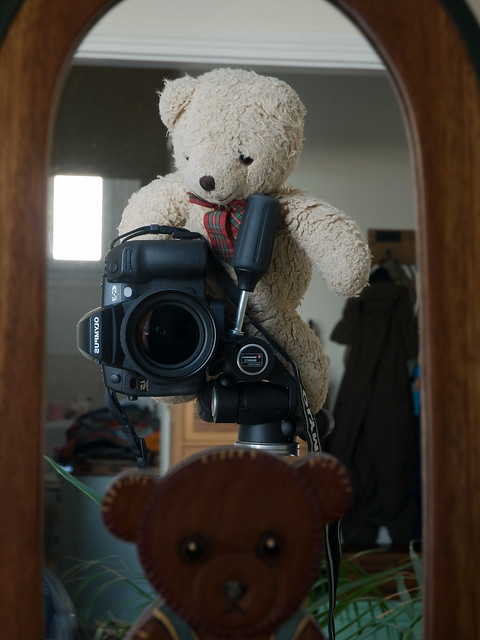

In [86]:

url = 'https://farm4.staticflickr.com/3009/2910224232_f7db5ed2b3_z.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image


Le bruit est ajouté aux tenseurs PyTorch plutôt qu'aux images Pillow. Nous allons d'abord définir des transformations d'images qui nous permettent de passer d'une image PIL à un tenseur PyTorch (sur lequel nous pouvons ajouter le bruit), et vice versa.

Ces transformations sont assez simples : nous normalisons d'abord les images en les divisant par 255 (de sorte qu'elles soient dans la plage [0,1]), puis nous nous assurons qu'elles sont dans la plage [-1,1]. Selon l'article DPPM :

Nous supposons que les données d'image sont des entiers dans {0, 1,..., 255} mis à l'échelle linéairement à [-1,1]. Cela garantit que le processus inverse du réseau de neurones fonctionne sur des entrées à échelle constante à partir de la distribution normale standard p(x_t).

In [87]:

"""
Nous importons plusieurs transformations d'image de la bibliothèque 
torchvision.transforms, puis définissons la taille de l'image souhaitée et 
créons une composition de transformations pour prétraiter l'image. 
Ensuite, nous appliquons cette composition à une image donnée et affichons la 
forme du tenseur résultant.
"""

image_size = 128 # Définit la taille de l'image en pixels

transform = Compose([ # Crée une composition de plusieurs transformations d'image
    Resize(image_size), # Redimensionne l'image à la taille définie (128 x 128 pixels)
    CenterCrop(image_size), # Effectue une découpe centrée de l'image à la taille définie (128 x 128 pixels)
    ToTensor(), # Convertit l'image en un tenseur PyTorch, change l'ordre des dimensions en CHW et divise les valeurs par 255
    Lambda(lambda t: (t * 2) - 1), # Applique une transformation Lambda pour mettre les valeurs du tenseur entre -1 et 1
])

x_start = transform(image).unsqueeze(0) # Applique la composition de transformations à l'image et ajoute une dimension supplémentaire pour le lot (batch) d'images
x_start.shape # Affiche la forme du tenseur résultant

torch.Size([1, 3, 128, 128])

Nous définissons également la transformation inverse qui prend en entrée un tenseur PyTorch contenant des valeurs dans l'intervalle [-1,1] et les convertit en une image PIL.

In [88]:

"""
Ici, nous créons une composition de transformation pour inverser le processus 
de prétraitement appliqué à l'image. Cela permet de revenir à une image PIL 
originale à partir d'un tenseur prétraité
"""

reverse_transform = Compose([ # Crée une composition de plusieurs transformations d'image pour inverser le processus de prétraitement
    Lambda(lambda t: (t + 1) / 2), # Applique une transformation Lambda pour remettre les valeurs du tenseur dans l'intervalle [0, 1]
    Lambda(lambda t: t.permute(1, 2, 0)), # Change l'ordre des dimensions du tenseur de CHW en HWC
    Lambda(lambda t: t * 255.), # Multiplie les valeurs du tenseur par 255 pour revenir à l'échelle originale des pixels
    Lambda(lambda t: t.numpy().astype(np.uint8)), # Convertit le tenseur en tableau Numpy et modifie le type de données en uint8
    ToPILImage(), # Convertit le tableau Numpy en une image PIL (Python Imaging Library)
])


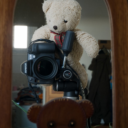

In [89]:
reverse_transform(x_start.squeeze())

Nous pouvons donc maintenant définir le processus de diffusion avant en utilisant une propriété intéressante : Cette propriété repose sur l'idée que, à chaque étape de la diffusion, nous pouvons générer un nouvel échantillon intermédiaire en combinant l'image d'origine et un bruit, pondérés par des facteurs spécifiques. Ces facteurs dépendent de la progression temporelle de la diffusion et sont déterminés par les variables sqrt_alphas_cumprod_t et sqrt_one_minus_alphas_cumprod_t.

Concrètement, cette propriété permet de simplifier le processus de diffusion en réduisant la complexité des calculs et en facilitant la compréhension de la manière dont les données évoluent à travers les différentes étapes de la diffusion. En exploitant cette propriété, nous sommes en mesure de créer des représentations intermédiaires de l'image qui incorporent à la fois les informations de l'image d'origine et celles du bruit, ce qui nous permet d'explorer et de manipuler ces données de manière plus efficace.

In [90]:
"""
Définissons donc la fonction  q_sample pour échantillonner q en utilisant la 
diffusion vers l'avant. La fonction prend en entrée un tenseur x_start, un 
index de temps t et un tenseur de bruit optionnel. Si le bruit n'est pas 
fourni, un bruit aléatoire ayant la même forme que x_start est généré. 
Ensuite, les facteurs sqrt_alphas_cumprod_t et sqrt_one_minus_alphas_cumprod_t 
sont extraits à l'aide de la fonction extract. Enfin, la fonction retourne le 
résultat de la diffusion vers l'avant en combinant x_start et le bruit avec 
les facteurs extraits.
"""

# diffusion vers l'avant (en utilisant la propriété intéressante)
def q_sample(x_start, t, noise=None): # Définit une fonction pour échantillonner q en utilisant la diffusion vers l'avant
    if noise is None: # Si le bruit n'est pas fourni
        noise = torch.randn_like(x_start) # Génère un bruit aléatoire ayant la même forme que x_start

    # Extrait sqrt_alphas_cumprod_t correspondant à l'index t pour chaque élément du lot (batch)
    sqrt_alphas_cumprod_t = extract(sqrt_alphas_cumprod, t, x_start.shape)
    # Extrait sqrt_one_minus_alphas_cumprod_t correspondant à l'index t pour chaque élément du lot (batch)
    sqrt_one_minus_alphas_cumprod_t = extract(
        sqrt_one_minus_alphas_cumprod, t, x_start.shape
    )

    # Retourne le résultat de la diffusion vers l'avant en combinant x_start et le bruit avec les facteurs extraits
    return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise


Testons maintenant ça sur une étape de temps en particulier :

In [91]:
"""
Pour la fonction get_noisy_image, nous prenons en entrée un tenseur x_start
et un index de temps t. La fonction appelle q_sample pour générer une version 
bruitée de x_start à l'étape t. Ensuite, elle applique la transformation 
inverse pour convertir le tenseur bruité en image PIL et retourne cette image
bruitée
"""

def get_noisy_image(x_start, t): # Définit une fonction pour obtenir une image bruitée à partir de x_start et de l'étape t
    # Ajoute du bruit
    x_noisy = q_sample(x_start, t=t) # Appelle la fonction q_sample pour générer une version bruitée de x_start à l'étape t

    # Reconvertit en image PIL
    noisy_image = reverse_transform(x_noisy.squeeze()) # Applique la transformation inverse pour transformer le tenseur bruité en image PIL

    return noisy_image # Retourne l'image bruitée


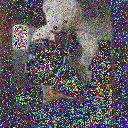

In [92]:
# choix de l'étape
t = torch.tensor([42])

get_noisy_image(x_start, t)

Visualisons plusieurs étapes de ce processus. Pour ce faire, nous allons définir une fonction `plot` pour afficher une grille d'images. La fonction prend en entrée une liste d'images (éventuellement sous forme de liste de listes), un booléen with_orig pour indiquer si l'image originale doit être incluse dans l'affichage, un argument row_title pour les titres des lignes, et des arguments supplémentaires pour la fonction imshow. La fonction crée une grille d'images en utilisant la bibliothèque matplotlib et affiche les images avec les titres et étiquettes spécifiés.

In [93]:

# Utilise une graine pour la reproductibilité
torch.manual_seed(0)

# source: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py
def plot(imgs, with_orig=False, row_title=None, **imshow_kwargs): # Définit une fonction pour afficher une grille d'images
    if not isinstance(imgs[0], list): # Vérifie si imgs est déjà une liste de listes
        # Crée une grille 2D même s'il n'y a qu'une seule ligne
        imgs = [imgs]

    num_rows = len(imgs) # Nombre de lignes dans la grille
    num_cols = len(imgs[0]) + with_orig # Nombre de colonnes dans la grille
    fig, axs = plt.subplots(figsize=(200,200), nrows=num_rows, ncols=num_cols, squeeze=False) # Crée une figure et des axes pour la grille d'images
    for row_idx, row in enumerate(imgs): # Parcourt les lignes d'images
        row = [image] + row if with_orig else row # Ajoute l'image originale à la ligne si with_orig est True
        for col_idx, img in enumerate(row): # Parcourt les images de la ligne
            ax = axs[row_idx, col_idx] # Sélectionne l'axe correspondant
            ax.imshow(np.asarray(img), **imshow_kwargs) # Affiche l'image sur l'axe
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]) # Supprime les étiquettes et les graduations des axes

    if with_orig: # Si l'image originale doit être affichée
        axs[0, 0].set(title='Original image') # Ajoute le titre "Original image" à la première cellule
        axs[0, 0].title.set_size(8) # Définit la taille du titre
    if row_title is not None: # Si des titres de lignes sont fournis
        for row_idx in range(num_rows): # Parcourt les lignes
            axs[row_idx, 0].set(ylabel=row_title[row_idx]) # Ajoute le titre de la ligne à la première colonne

    plt.tight_layout() # Ajuste automatiquement le format de la grille pour un affichage optimal


In [94]:
plot([get_noisy_image(x_start, torch.tensor([t])) for t in [0, 50, 100, 150, 199]])

#### Fonction de perte

Notre objectif étant d'entraîner un modèle de débruitage qui puisse  reconstruire l'image originale à partir d'une image bruitée, nous avons besoin d'une fonction de perte qui mesure la différence entre le bruit réel (qui a été ajouté à l'image originale) et le bruit prédit par le modèle de débruitage.

Les fonctions de perte L1, L2 (MSE) et Huber sont couramment utilisées dans les tâches de régression pour mesurer la différence entre deux signaux ou images. Dans notre cas, ces fonctions de perte mesurent la différence entre le bruit réel et le bruit prédit. En minimisant cette perte, notre modèle de débruitage apprendra à prédire correctement le bruit ajouté à l'image originale, ce qui nous permettra de reconstruire l'image originale en enlevant le bruit prédit.

Pour ce qui est du détail de ces fonctions de perte :
1. Perte L1 (erreur absolue moyenne) :
Elle correspond à la moyenne des différences absolues entre les valeurs réelles et les valeurs prédites. Imaginez que vous ayez une série de distances réelles et une série de distances estimées. La perte L1 est la moyenne des écarts entre les distances réelles et estimées, sans tenir compte du sens (positif ou négatif) de l'écart.. Mathématiquement, elle est définie comme suit :

$$
L1(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

où $y$ est le vecteur des valeurs réelles, $\hat{y}$ est le vecteur des valeurs prédites et n est le nombre d'échantillons. La perte L1 est moins sensible aux valeurs aberrantes que la perte L2 en raison de la manière dont elles traitent les différences entre les valeurs réelles et prédites.

2. Perte L2 (erreur quadratique moyenne ou Mean Squared Error - MSE) :
Elle correspond à la moyenne des carrés des différences entre les valeurs réelles et les valeurs prédites. Si on reprend l'exemple des distances réelles et estimées, la perte L2 est la moyenne des carrés des écarts entre les distances réelles et estimées. Cela donne plus de poids aux grands écarts qu'aux petits. Mathématiquement, elle est définie ainsi :

$$
L2(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

où $y$ est le vecteur des valeurs réelles, $\hat{y}$ est le vecteur des valeurs prédites et $n$ est le nombre d'échantillons. La perte L2 est, comme je le disais, plus sensible aux valeurs aberrantes que la perte L1, car tandis que la perte L1 calcule la moyenne des différences absolues entre les valeurs réelles et prédites. Dans ce cas, chaque différence est traitée de manière linéaire, c'est-à-dire que si la différence double, la perte double aussi. Ainsi, les valeurs aberrantes ont un impact proportionnel sur la perte L1. En revanche,  la perte L2 calcule la moyenne des carrés des différences entre les valeurs réelles et prédites. Cela signifie que les écarts plus importants sont amplifiés (au carré), ce qui donne plus de poids aux valeurs aberrantes. Par conséquent, la perte L2 est plus sensible aux valeurs aberrantes.
Pour mieux illustrer cela, maginez que vous compariez les erreurs de deux estimations : l'une avec une erreur de 1 et l'autre avec une erreur de 10. La perte L1 donnerait un poids 10 fois plus important à la plus grande erreur (10/1 = 10), tandis que la perte L2 donnerait un poids 100 fois plus important (100/1 = 100) à la plus grande erreur. Cette amplification des grandes erreurs rend la perte L2 plus sensible aux valeurs aberrantes que la perte L1.

3. Perte Huber (Smooth L1 Loss) :
La perte Huber est une combinaison des pertes L1 et L2. Elle utilise la perte L1 pour les erreurs de petite amplitude et la perte L2 pour les erreurs de grande amplitude. Cela permet d'obtenir un compromis entre la sensibilité aux valeurs aberrantes de la perte L1 et la régularité de la perte L2. maginez que vous évaluiez la performance d'un joueur de fléchettes. Pour les lancers proches de la cible, vous utilisez la perte L1, qui donne moins de poids aux petites erreurs. Pour les lancers loin de la cible, vous utilisez la perte L2, qui donne plus de poids aux grandes erreurs. La perte Huber combine ces deux approches en fonction d'un seuil ($\sigma$) pour déterminer si un lancer est considéré comme proche ou loin de la cible.Mathématiquement, elle est définie comme suit :

$$
\text{Huber}(y, \hat{y}, \delta) = \frac{1}{n} \sum_{i=1}^n h(y_i - \hat{y}_i, \delta)
$$

où $h(e, \sigma)$ est la fonction Huber défini comme

$$
h(e, \delta) =
\begin{cases}
0.5 * e^2, & \text{si}\ |e| \leq \delta \\
\delta * (|e| - 0.5 * \delta), & \text{sinon}
\end{cases}
$$

Chacune de ces fonctions de perte a ses propres propriétés et avantages. La perte L1 est moins sensible aux valeurs aberrantes que la perte L2, ce qui peut être bénéfique si les erreurs de prédiction du bruit ont une distribution non gaussienne. La perte Huber est une combinaison des pertes L1 et L2, offrant un compromis entre les deux. En permettant de choisir entre ces différentes fonctions de perte, nous pouvons adapter notre modèle DDPM aux propriétés spécifiques du bruit

In [95]:
def p_losses(denoise_model, x_start, t, noise=None, loss_type="l1"): # Définit la fonction de perte pour le DDPM
    if noise is None: # Si aucun bruit n'est fourni
        noise = torch.randn_like(x_start) # Génère du bruit aléatoire de la même forme que x_start

    x_noisy = q_sample(x_start=x_start, t=t, noise=noise) # Génère une image bruitée à partir de x_start et du bruit
    predicted_noise = denoise_model(x_noisy, t) # Calcule le bruit prédit par le modèle de débruitage à partir de l'image bruitée

    if loss_type == 'l1': # Si le type de perte est L1
        loss = F.l1_loss(noise, predicted_noise) # Calcule la perte L1 entre le bruit réel et le bruit prédit
    elif loss_type == 'l2': # Si le type de perte est L2
        loss = F.mse_loss(noise, predicted_noise) # Calcule la perte L2 (MSE) entre le bruit réel et le bruit prédit
    elif loss_type == "huber": # Si le type de perte est Huber
        loss = F.smooth_l1_loss(noise, predicted_noise) # Calcule la perte de Huber entre le bruit réel et le bruit prédit
    else:
        raise NotImplementedError() # Si le type de perte n'est pas implémenté, lève une erreur

    return loss # Retourne la valeur de la perte


Le `denoise_model` sera notre réseau U-Net. Nous utiliserons la fonction de perte de Hubert entre le bruit réel et le bruit prédit

#### Dataset et DataLoader

Le dataset que nous allons définir ici contient simplement des images qui proviennent d'un ensemble de données réel, tel que Fashion-MNIST, CIFAR-10 ou ImageNet, mises à l'échelle de manière linéaire pour être comprises entre -1 et 1.

Chaque image est redimensionnée à la même taille. Il est intéressant de noter que les images sont également horizontalement retournées de manière aléatoire. (comme dans [Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2006.11239))

J'ais utilisé des retournements horizontaux aléatoires lors de l'entraînement pour CIFAR10 ; j'ai essayé d'entraîner avec et sans retournements, et j'ai constaté que les retournements amélioraient légèrement la qualité de l'échantillon.

In [96]:

# Charge le jeu de données "fashion_mnist"
dataset = load_dataset("fashion_mnist")

# Définit la taille des images du jeu de données (28x28 pixels)
image_size = 28

# Définit le nombre de canaux de l'image (1 pour les images en niveaux de gris)
channels = 1

# Définit la taille des lots (nombre d'images traitées simultanément) lors de l'entraînement du modèle
batch_size = 128


  0%|          | 0/2 [00:00<?, ?it/s]

Définissons une fonction que nous appliquerons à la volée sur l'ensemble de notre jeu de données. Pour cela, nous utiliserons la fonctionnalité `with_transform`. La fonction applique simplement quelques pré-traitements d'image de base :
- retournements horizontaux aléatoires
- mise à l'échelle
- fait en sorte que les valeurs soient comprises dans l'intervalle [-1, 1] (normalisation)

In [97]:

# Définit les transformations d'image
transform = Compose([
  transforms.RandomHorizontalFlip(), # Symétrie horizontale aléatoire
  transforms.ToTensor(), # Convertit en tenseur PyTorch
  transforms.Lambda(lambda t: (t * 2) - 1) # Normalise les pixels dans l'intervalle [-1, 1]
])

# Définit la fonction de transformation
def transforms(examples):
  # Applique les transformations d'image aux exemples
  examples["pixel_values"] = [transform(image.convert("L")) for image in examples["image"]]

  # Supprime la clé "image" pour économiser de la mémoire
  del examples["image"]

  # Retourne les exemples transformés
  return examples

# Applique la fonction de transformation aux données et supprime la colonne "label"
transformed_dataset = dataset.with_transform(transforms).remove_columns("label")

# Crée un chargeur de données (dataloader) pour l'ensemble d'apprentissage
dataloader = DataLoader(transformed_dataset["train"], batch_size=batch_size, shuffle=True)

In [98]:

# Récupérer le prochain élément (batch) du chargeur de données (dataloader)
batch = next(iter(dataloader))

# Afficher les clés du dictionnaire 'batch' (colonne "pixel_values" qui contient les valeurs des pixels des images transformées)
print(batch.keys())


dict_keys(['pixel_values'])


#### Echantillonnage

Maintenant, nous allons écrire le code pour générer de nouvelles images à partir de notre modèle de diffusion. Pour cela, nous allons utiliser l'algorithme suivant (également dans [Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2006.11239)):

1. : $x_t \sim \mathcal{N}(0, I)$
2. : **for** $t=T,...,1$ **do**
3. : &nbsp;&nbsp;&nbsp;&nbsp;$z \sim \mathcal{N}(0, I)$ **if** $t>1$ **else** $z=0$
4. : $x_{t-1} = \frac{1}{\sqrt{\alpha_t}} (x_t - \frac{1-\alpha_t}{\sqrt{1-\hat{\alpha}_t}}\epsilon_\theta(x_t, t)) + \sigma_tz$
5. : **end for**
6. : **return** $x_0$

Cet algorithme consiste à inverser le processus de diffusion en partant de l'étape finale ($T$) où nous échantillonnons du bruit pur à partir d'une distribution gaussienne, puis nous utilisons notre réseau de neurones pour le débruiter progressivement en utilisant la probabilité conditionnelle qu'il a apprise jusqu'à-ce que nous atteignons l'étape 0 (t=0). Nous dériverons une image légèrement moins débruitée en utilisant notre prédicteur de bruit pour brancher la reparamétrisantion de la moyenne. Idéalement, nous finirons avec une image qui ressemble à celle provenant de la distribution réelle des données

In [99]:
## code :
# Désactive le calcul des gradients pour améliorer les performances
@torch.no_grad()
def p_sample(model, x, t, t_index):
    # Extrait les éléments de betas correspondant au temps t et à la forme de x
    betas_t = extract(betas, t, x.shape)
    # Extrait les éléments de sqrt_one_minus_alphas_cumprod correspondant au temps t et à la forme de x
    sqrt_one_minus_alphas_cumprod_t = extract(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    # Extrait les éléments de sqrt_recip_alphas correspondant au temps t et à la forme de x
    sqrt_recip_alphas_t = extract(sqrt_recip_alphas, t, x.shape)
    
    # Utilise notre modèle (prédicteur de bruit) pour prédire la moyenne
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )

    if t_index == 0:
        return model_mean
    else:
        # Extrait les éléments de posterior_variance correspondant au temps t et à la forme de x
        posterior_variance_t = extract(posterior_variance, t, x.shape)
        # Génère un bruit aléatoire avec la même forme que x
        noise = torch.randn_like(x)
        # Ligne 4 de l'algorithme 2 :
        return model_mean + torch.sqrt(posterior_variance_t) * noise 

# Algorithme décrit dans la cellule de texte juste au dessus (y compris le retour de toutes les images)
@torch.no_grad()
def p_sample_loop(model, shape):
    # Récupère le périphérique (GPU ou CPU) sur lequel le modèle est exécuté
    device = next(model.parameters()).device

    b = shape[0]
    # Commence à partir d'un bruit pur (pour chaque exemple dans le lot)
    img = torch.randn(shape, device=device)
    imgs = []

    # Boucle sur les pas de temps en ordre inverse
    for i in tqdm(reversed(range(0, timesteps)), desc='sampling loop time step', total=timesteps):
        # Calcule l'échantillon pour l'étape de temps courante
        img = p_sample(model, img, torch.full((b,), i, device=device, dtype=torch.long), i)
        # Ajoute l'image calculée à la liste des images
        imgs.append(img.cpu().numpy())
    return imgs

@torch.no_grad()
def sample(model, image_size, batch_size=16, channels=3):
    # Appelle la fonction p_sample_loop avec la taille et la forme d'image spécifiées
    return p_sample_loop(model, shape=(batch_size, channels, image_size, image_size))


#### Entraînement

In [100]:

# Définit une fonction pour diviser un nombre en groupes d'un certain diviseur
def num_to_groups(num, divisor):
    # Calcule combien de groupes complets peuvent être formés avec le diviseur
    groups = num // divisor
    # Calcule le reste de la division
    remainder = num % divisor
    # Crée un tableau avec le diviseur répété 'groups' fois
    arr = [divisor] * groups
    # Si le reste est supérieur à 0, l'ajoute au tableau
    if remainder > 0:
        arr.append(remainder)
    # Retourne le tableau des groupes
    return arr

# Crée un objet Path pour le dossier des résultats
results_folder = Path("./results")
# Crée le dossier s'il n'existe pas déjà
results_folder.mkdir(exist_ok=True)
# Définit une variable pour enregistrer et échantillonner tous les 'save_and_sample_every' pas
save_and_sample_every = 1000


In [101]:

# Vérifie si un GPU est disponible, sinon utilise le CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Crée une instance du modèle Unet avec les dimensions d'image et les canaux spécifiés
model = Unet(
    dim=image_size,
    channels=channels,
    dim_mults=(1, 2, 4,)  # Multiplieurs de dimension pour les couches internes du modèle
)
# Déplace le modèle vers le périphérique (GPU ou CPU) choisi
model.to(device)

# Crée un optimiseur Adam pour les paramètres du modèle avec un taux d'apprentissage de 1e-3
optimizer = Adam(model.parameters(), lr=1e-3)


Let'go !

Loss: 0.04618339613080025
Loss: 0.04219190031290054
Loss: 0.04721781983971596
Loss: 0.040081217885017395
Loss: 0.03452838584780693
Loss: 0.03927702456712723
Loss: 0.02874765917658806
Loss: 0.03393413498997688
Loss: 0.03249266743659973
Loss: 0.03425415977835655
Loss: 0.0331592857837677
Loss: 0.03793716803193092
Loss: 0.03569449856877327
Loss: 0.041175004094839096
Loss: 0.028396273031830788
Loss: 0.029669148847460747
Loss: 0.04020781069993973
Loss: 0.03671015053987503
Loss: 0.03397785499691963
Loss: 0.03144817799329758
Loss: 0.031844548881053925
Loss: 0.035397253930568695
Loss: 0.03133976832032204
Loss: 0.03459632396697998
Loss: 0.03868471831083298
Loss: 0.025895943865180016
Loss: 0.036164917051792145
Loss: 0.03525128588080406
Loss: 0.03509350121021271
Loss: 0.037300921976566315


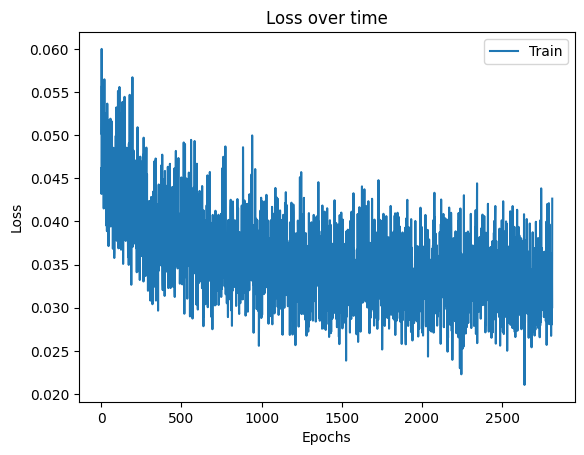

In [103]:

# Définit le nombre d'époques pour l'entraînement
epochs = 6

# serviront à stocker la perte et l'époque
losses = []
epochs_list = []


# Boucle sur les époques
for epoch in range(epochs):

    # Boucle sur les lots de données du chargeur de données
    for step, batch in enumerate(dataloader):
        # Réinitialise les gradients de l'optimiseur
        optimizer.zero_grad()

        # Récupère la taille du lot
        batch_size = batch["pixel_values"].shape[0]
        # Déplace le lot vers le périphérique (GPU ou CPU) choisi
        batch = batch["pixel_values"].to(device)

        # Ligne 3 de l'algorithme 1 : échantillonne t uniformément pour chaque exemple du lot
        t = torch.randint(0, timesteps, (batch_size,), device=device).long()

        # Calcule les pertes pour le modèle, le lot et les valeurs de t échantillonnées
        loss = p_losses(model, batch, t, loss_type="huber")

        # Affiche la perte toutes les 100 étapes
        if step % 100 == 0:
            print("Loss:", loss.item())

        # ajoute la perte en cours à la liste de pertes
        losses.append(loss.item())

        # Calcule les gradients pour la perte
        loss.backward()
        # Met à jour les paramètres du modèle en utilisant l'optimiseur
        optimizer.step()

        # Sauvegarde les images générées
        if step != 0 and step % save_and_sample_every == 0:
            # Calcule le jalon actuel pour nommer les fichiers d'image
            milestone = step // save_and_sample_every
            # Divise le nombre d'images à générer en groupes de la taille du lot
            batches = num_to_groups(4, batch_size)
            # Génère les images pour chaque groupe et les concatène
            all_images_list = list(map(lambda n: sample(model, batch_size=n, channels=channels), batches))
            all_images = torch.cat(all_images_list, dim=0)
            # Redimensionne les images pour être comprises entre 0 et 1
            all_images = (all_images + 1) * 0.5
            # Sauvegarde les images générées dans le dossier des résultats
            save_image(all_images, str(results_folder / f'sample-{milestone}.png'), nrow=6)
        
        # ajoute l'époque à la liste des époques
        epochs_list.append(step + epoch * len(dataloader))


# affiche le graphique de performances
plt.plot(epochs_list, losses, label="Train")
plt.title("Loss over time")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Echantillonnage (inférence)

sampling loop time step:   0%|          | 0/300 [00:00<?, ?it/s]

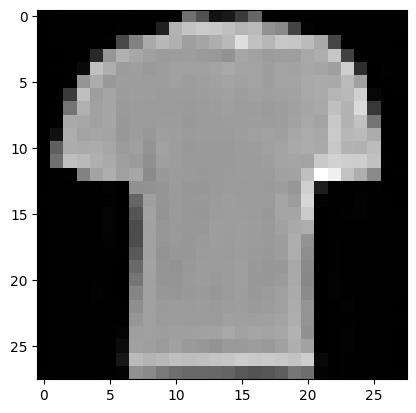

In [113]:
"""
Génère 64 images à partir d'un modèle entrainé et stocke ces images dans la 
variable samples. La fonction sample est appelée avec les arguments suivants : 
  - model (le modèle entrainé), 
  - image_size (la taille de l'image à générer), 
  - batch_size (le nombre d'images à générer simultanément)
  - channels (le nombre de canaux dans l'image).
"""
samples = sample(
  model, 
  image_size=image_size, 
  batch_size=64, 
  channels=channels
)

"""
 une image aléatoire est choisie parmi les 64 images générées. Ici, la variable 
 random_index est définie pour contenir un entier aléatoire entre 0 et 63, puis 
 la ligne suivante affiche l'image correspondante à cet index. La dernière 
 ligne utilise la fonction imshow de la bibliothèque matplotlib pour afficher 
 l'image, en la redimensionnant à une image de taille image_size par image_size 
 et en utilisant le mode de couleur "gray" (niveaux de gris).
"""
random_index = 9
plt.imshow(
  samples[-1][random_index].reshape(
    image_size, 
    image_size, 
    channels
  ), 
  cmap="gray"
)

Et c'est... Un magnifique t-shirt, toutes mes félicitations !! Les résultats peuvent praître modestes, mais n'oubliez pas que nous avons entraîné notre modèles sur des images 28*28 😉

#### Un gif pour la route !

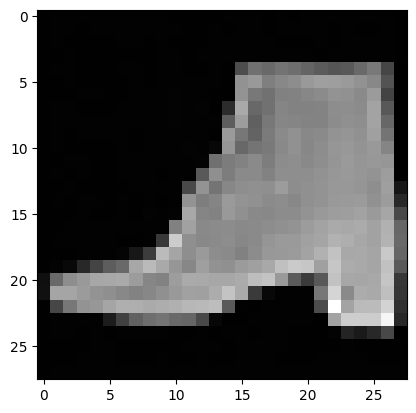

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:

# choisir un index aléatoire
random_index = 52
# initialiser la figure
fig = plt.figure()
ims = []

# boucle sur chaque étape de la diffusion
for i in range(timesteps):
    # ajouter l'image à la liste
    im = plt.imshow(samples[i][random_index].reshape(image_size, image_size, channels), cmap="gray", animated=True)
    ims.append([im])

# créer l'animation
animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

# enregistrer l'animation en tant que fichier GIF
animate.save('diffusion.gif', writer='pillow')

# afficher l'animation
plt.show()

# télécharge le gif créé si l'environnement d'exécution est google colaboratory
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    files.download('diffusion.gif')

#### Pour aller plus loin :

1. [Jonathan Ho, Ajay Jain, and Pieter Abbeel. 2020. Denoising diffusion probabilistic models. In Advances in Neural Information Processing Systems,
Vol. 33. 6840–6851](https://proceedings.neurips.cc/paper/2020/file/4c5bcfec8584af0d967f1ab10179ca4b-Paper.pdf).
  Ce papier donne un aperçu des modèles de diffusion, une nouvelle famille de modèles génératifs profonds à hautes performances dans des applications telles que la synthèse d'images, la génération de vidéos et la conception de molécules. L'enquête classe la recherche en trois domaines clés : échantillonnage efficace, estimation améliorée de la vraisemblance et traitement des données avec des structures spéciales, et discute de la possibilité de combiner des modèles de diffusion avec d'autres modèles génératifs.

  **Idées clés et enseignements :**

  - Les modèles de diffusion sont une famille puissante de modèles génératifs profonds qui ont atteint des performances record dans diverses applications.
  - L'enquête classe la recherche sur les modèles de diffusion en trois domaines clés : échantillonnage efficace, estimation améliorée de la vraisemblance et traitement des données avec des structures spéciales.
  - La combinaison de modèles de diffusion avec d'autres modèles génératifs peut conduire à de meilleurs résultats.
  - Les modèles de diffusion ont un large éventail d'applications dans divers domaines, notamment la vision par ordinateur, la génération de langage naturel, la modélisation de données temporelles et des applications interdisciplinaires dans d'autres disciplines scientifiques.
  - L'enquête fournit un regard contextualisé et approfondi sur l'état des modèles de diffusion, en identifiant les principaux domaines d'intérêt et en indiquant les domaines potentiels pour une exploration plus approfondie.

2. [Jascha Sohl-Dickstein, Eric Weiss, Niru Maheswaranathan, and Surya Ganguli. 2015. Deep unsupervised learning using nonequilibrium thermodynamics. In International Conference on Machine Learning. 2256–2265](https://arxiv.org/abs/1503.03585).

  Les auteurs proposent une approche d'apprentissage profond non supervisée utilisant la thermodynamique hors équilibre pour modéliser des ensembles de données complexes à l'aide de familles de distributions de probabilité hautement flexibles et facilement gérables.

  **Idées clés :**

  - L'apprentissage non supervisé est un problème central en apprentissage automatique, qui nécessite une modélisation de données complexes à l'aide de familles de distributions de probabilité hautement flexibles et facilement gérables.
  - Les auteurs proposent une approche inspirée de la physique statistique hors équilibre, qui consiste à détruire systématiquement et lentement la structure d'une distribution de données par un processus de diffusion avant, puis à apprendre un processus de diffusion inverse qui restaure la structure des données, générant ainsi un modèle génératif hautement flexible et facilement gérable.
  - Cette approche permet de modéliser rapidement des données avec des milliers de couches ou de pas de temps, ainsi que de calculer des probabilités conditionnelles et postérieures sous le modèle appris.
  - Les auteurs ont également publié une implémentation de référence open source de l'algorithme proposé.

  **Leçons tirées du document :**

  L'utilisation de la thermodynamique hors équilibre peut être une approche prometteuse pour développer des algorithmes d'apprentissage profond flexibles et facilement gérables.
  Cette approche peut être utile pour modéliser des données complexes dans des domaines tels que la vision par ordinateur et la reconnaissance de la parole.



3. [Daphne Koller and Nir Friedman. 2009. Probabilistic graphical models: principles and techniques. MIT press.](http://mcb111.org/w06/KollerFriedman.pdf)
  Le livre présente les modèles graphiques probabilistes (PGM), qui sont des outils puissants pour modéliser des systèmes complexes avec incertitude, et détaille comment les utiliser pour effectuer des inférences et des apprentissages. Les auteurs présentent les principes fondamentaux des PGM, les techniques d'inférence et d'apprentissage, et les applications pratiques dans divers domaines tels que la bioinformatique, la vision par ordinateur, le traitement du langage naturel et la robotique.

  **Idées clés et leçons tirées :**

  - Représentation de la connaissance incertaine : Les PGM permettent de représenter des relations complexes et incertaines entre les variables d'un système, en utilisant des graphes pour décrire la structure de dépendance entre les variables.

  - Types de PGM : Les principaux types de PGM sont les réseaux bayésiens et les réseaux de Markov. Les réseaux bayésiens sont des graphes dirigés qui représentent les relations de cause à effet entre les variables, tandis que les réseaux de Markov sont des graphes non dirigés qui représentent les relations de corrélation entre les variables.

 -  Inférence : Les PGM permettent d'effectuer des inférences sur des variables d'intérêt à partir des observations et des connaissances antérieures. L'inférence exacte est généralement réalisée par des algorithmes tels que l'élimination de variables et la propagation de croyances, tandis que l'inférence approchée est réalisée par des techniques de simulation telles que le Monte Carlo par chaînes de Markov (MCMC) et l'échantillonnage de Gibbs.

  - Apprentissage : L'apprentissage dans les PGM consiste à estimer les paramètres et la structure du modèle à partir des données observées. Les méthodes d'apprentissage incluent l'apprentissage de paramètres (par exemple, l'estimation maximale de vraisemblance) et l'apprentissage de structure (par exemple, la recherche et le score).

  - Modèles génératifs et discriminatifs : Les PGM peuvent être classés en modèles génératifs (qui modélisent les relations de cause à effet) et discriminatifs (qui modélisent directement la relation entre les variables d'entrée et de sortie). Les modèles génératifs incluent les réseaux bayésiens, tandis que les modèles discriminatifs incluent les champs aléatoires conditionnels et les machines à vecteurs de support.
  - Applications pratiques : Les PGM sont utilisés dans divers domaines, notamment :

      - Bioinformatique : Ils servent à modéliser les séquences génétiques, les réseaux de régulation génétique et les interactions protéine-protéine, aidant ainsi à comprendre les mécanismes biologiques et à identifier les cibles thérapeutiques.

      - Vision par ordinateur : Les PGM aident à résoudre des problèmes tels que la segmentation d'image, la reconnaissance d'objets, la reconstruction 3D et l'estimation de mouvement, en modélisant les relations entre les pixels, les objets et les scènes.

      - Traitement du langage naturel (NLP) : Les PGM sont utilisés pour la désambiguïsation lexicale, la reconnaissance d'entités nommées, l'analyse syntaxique et la traduction automatique, en modélisant les relations entre les mots, les phrases et les sens.

      - Robotique : Les PGM sont employés pour la planification de mouvements, la navigation, la reconnaissance d'objets et la perception multisensorielle, en modélisant les relations entre les capteurs, les effecteurs et l'environnement.

      - Médecine : Les PGM sont utilisés pour la modélisation de maladies, la prédiction de résultats cliniques, le diagnostic médical et la planification de traitement, en tenant compte des relations complexes et incertaines entre les symptômes, les facteurs de risque et les interventions.

      - Systèmes de recommandation : Les PGM peuvent être utilisés pour modéliser les préférences des utilisateurs et les relations entre les éléments, afin de générer des recommandations personnalisées.

      - Finance : Les PGM sont appliqués pour estimer les risques financiers, modéliser les marchés et prédire les mouvements de prix, en prenant en compte les relations incertaines entre les variables économiques et financières.


4. [Nicholas Metropolis and Stanislaw Ulam. 1949. The monte carlo method. Journal of the American statistical association 44, 247 (1949), 335–341](https://people.bordeaux.inria.fr/pierre.delmoral/MetropolisUlam49.pdf)

  Il s'agit d'un article pionnier qui présente la méthode de Monte Carlo, une technique de simulation basée sur l'échantillonnage aléatoire pour résoudre des problèmes mathématiques et statistiques complexes. Les auteurs expliquent les principes de base de la méthode, discutent de ses avantages et inconvénients et décrivent plusieurs exemples d'application, notamment en physique nucléaire et en théorie des jeux.

  **Idées clés et leçons tirées :**

  - Principe de base : La méthode de Monte Carlo consiste à générer un grand nombre d'échantillons aléatoires et à utiliser les propriétés statistiques de ces échantillons pour résoudre des problèmes mathématiques et statistiques.

  - Avantages : La méthode de Monte Carlo présente plusieurs avantages par rapport aux méthodes analytiques traditionnelles, notamment la capacité à traiter des problèmes complexes et multidimensionnels, l'absence de besoin de formules mathématiques explicites et la facilité d'implémentation sur des ordinateurs.

  - Inconvénients : La principale limitation de la méthode de Monte Carlo est l'erreur d'échantillonnage, qui dépend de la taille de l'échantillon et de la qualité de l'échantillonnage. Pour réduire cette erreur, il peut être nécessaire d'utiliser de grands échantillons ou d'appliquer des techniques d'échantillonnage plus avancées, telles que l'échantillonnage d'importance.

  - Applications en physique nucléaire : Metropolis et Ulam décrivent comment la méthode de Monte Carlo peut être utilisée pour résoudre des problèmes en physique nucléaire, tels que le transport de neutrons et la réaction en chaîne nucléaire. La méthode permet de modéliser les interactions complexes et incertaines entre les particules et les matériaux et d'obtenir des estimations précises des quantités d'intérêt.

  - Applications en théorie des jeux : Les auteurs expliquent également comment la méthode de Monte Carlo peut être appliquée à la théorie des jeux, en particulier pour résoudre des problèmes de stratégie optimale et d'équilibre. La méthode permet de simuler les résultats possibles des actions des joueurs et d'estimer les valeurs attendues des stratégies.

5. [Improved Denoising Diffusion Probabilistic Models](https://arxiv.org/abs/2102.09672)

  Cet article propose des modifications aux modèles probabilistes de diffusion de débruitage (DDPM) pour obtenir des log-vraisemblances compétitives tout en maintenant une qualité d'échantillon élevée, permettant le déploiement pratique de ces modèles.

  **Idées clés et leçons tirées de l'article :**

  - Les DDPM sont des modèles génératifs qui produisent d'excellents échantillons.
  - Les auteurs proposent des modifications aux DDPM qui améliorent leur log-vraisemblance tout en maintenant une haute qualité d'échantillon.
  - L'apprentissage des variances du processus de diffusion inverse permet un échantillonnage avec moins de passages vers l'avant, ce qui est important pour le déploiement pratique.
  - Les auteurs comparent la couverture de la distribution cible par les DDPM et les GAN en utilisant la précision et le rappel.
  - La qualité et la probabilité de l'échantillon évoluent en douceur avec la capacité du modèle et le calcul de la formation, ce qui rend les DDPM facilement évolutifs.


6. [Cascaded Diffusion Models for High Fidelity Image Generation](https://arxiv.org/abs/2106.15282)

  Cet article décrit comment les modèles de diffusion en cascade peuvent générer des images de haute qualité sans avoir recours à des classificateurs d'images auxiliaires pour améliorer la qualité des échantillons.

  **Idées clés :**

  - Les modèles de diffusion en cascade sont capables de générer des images de haute qualité sans avoir besoin de classificateurs d'images auxiliaires.
  - Un modèle de diffusion en cascade se compose d'une série de modèles de diffusion qui génèrent des images de résolution croissante.
  - La qualité des échantillons dépend de l'augmentation de conditionnement, une méthode de l'équipe pour augmenter les entrées de conditionnement à plus basse résolution pour les modèles à plus haute résolution.
  - Les modèles de diffusion en cascade surpassent BigGAN-deep et ont des scores de précision de classification de 63,02% (top-1) et 84,06% (top-5) sur ImageNet.
  
  **Leçons tirées :**

  - L'augmentation de conditionnement est essentielle pour prévenir les erreurs de propagation lors de l'échantillonnage de modèles de diffusion en cascade.
  - Les modèles de diffusion en cascade peuvent générer des images de haute qualité sans avoir besoin de classificateurs d'images auxiliaires.
  - Les modèles de diffusion en cascade surpassent les performances des modèles concurrents sur ImageNet.

7. [Diffusion Models Beat GANs on Image Synthesis](https://arxiv.org/abs/2105.05233) 

  Les auteurs démontrent que les modèles de diffusion surpassent les GAN en termes de qualité d'échantillon d'image sur les tâches de synthèse d'images inconditionnelles et conditionnelles, obtenant des résultats de pointe avec des conseils de classificateur et un suréchantillonnage, et libérant leur code pour que d'autres l'utilisent.

  **Idées clés et leçons tirées du document :**

  - Les modèles de diffusion peuvent obtenir une meilleure qualité d'échantillon d'image que les modèles génératifs de pointe actuels comme les GAN.
  - Les auteurs ont amélioré la qualité de l'échantillon avec des conseils de classificateur, une méthode simple et efficace pour équilibrer la diversité et la fidélité dans la synthèse d'images conditionnelle.
  - Les auteurs ont obtenu des scores FID de 2,97 sur ImageNet 128x128, 4,59 sur ImageNet 256x256 et 7,72 sur ImageNet 512x512, correspondant à BigGAN-deep avec aussi peu que 25 passes avant par échantillon tout en maintenant une meilleure couverture de distribution.
  - Le guidage du classificateur combiné à des modèles de diffusion de suréchantillonnage a encore amélioré les scores FID sur ImageNet 256x256 et 512x512.
  - Les auteurs publient leur code pour que d'autres puissent l'utiliser.

8. [Classifier-Free Diffusion Guidance](https://openreview.net/pdf?id=qw8AKxfYbI)

  présente une méthode pour améliorer la qualité des échantillons tout en réduisant leur diversité dans les modèles de diffusion conditionnelle. La méthode proposée se base sur une approche sans classificateur, contrairement à la méthode de "Classifier Guidance" précédemment introduite. En entraînant conjointement un modèle de diffusion conditionnel et inconditionnel, il est possible d'atteindre un compromis entre qualité et diversité des échantillons sans utiliser de classificateur supplémentaire.

  **Idées clés et leçons tirées :**

  - Simplicité : La méthode sans classificateur est extrêmement simple à mettre en œuvre, nécessitant seulement une modification mineure du code lors de l'entraînement et de l'échantillonnage.

  - Pas de classificateur supplémentaire : La méthode sans classificateur permet d'obtenir un compromis entre qualité et diversité des échantillons sans recourir à un classificateur supplémentaire, ce qui simplifie le processus d'entraînement.

  - Explication intuitive : La méthode sans classificateur fonctionne en diminuant la vraisemblance inconditionnelle de l'échantillon tout en augmentant la vraisemblance conditionnelle.

  - Amélioration des métriques de qualité : La méthode sans classificateur parvient à améliorer les métriques de qualité des échantillons (comme l'Inception Score et le FID) sans utiliser de gradients de classificateurs, démontrant ainsi que les modèles génératifs purs sont capables d'optimiser ces métriques.

  - Vitesse d'échantillonnage : Un inconvénient potentiel de la méthode sans classificateur est la vitesse d'échantillonnage, car elle nécessite deux passes en avant du modèle de diffusion, ce qui peut être plus lent que l'utilisation d'un classificateur. Des travaux futurs pourraient explorer comment améliorer cet aspect.

  - Diversité des échantillons : Les méthodes d'orientation qui améliorent la fidélité des échantillons aux dépens de la diversité soulèvent la question de l'acceptabilité de la diversité réduite. Il serait intéressant d'étudier comment améliorer la qualité des échantillons tout en maintenant leur diversité.

9. [Hierarchical Text-Conditional Image Generation with CLIP Latents (DALL-E)](https://cdn.openai.com/papers/dall-e-2.pdf)
  C'est cet article qui m'a donné envie de faire cette série de notebooks ! L'article présente unCLIP, un modèle de génération d'image basé sur le texte, qui utilise les représentations robustes d'image et de texte fournies par CLIP et les modèles de diffusion. unCLIP se compose de deux étapes : un modèle de priorité générant une représentation d'image CLIP à partir d'une légende textuelle, et un décodeur qui génère une image conditionnée par la représentation d'image. Les expériences montrent que unCLIP produit des images de qualité comparable à d'autres modèles, comme GLIDE, mais avec une plus grande diversité.

  **Idées clés :**

  - Utilisation des modèles de diffusion pour générer des images à partir des représentations CLIP.
  - Deux étapes : un modèle de priorité pour générer une représentation d'image CLIP et un décodeur pour générer l'image.
  - Comparaison avec d'autres systèmes de génération d'image tels que DALL-E et GLIDE.
  - Découverte que les modèles de diffusion sont plus efficaces sur le plan informatique et produisent des échantillons de meilleure qualité.

  **Leçons apprises :**

  - unCLIP offre une meilleure diversité d'images par rapport à d'autres modèles, tels que GLIDE, tout en maintenant une qualité comparable.
  - Les modèles de diffusion sont une alternative prometteuse aux modèles autoregressifs pour générer des images à partir de représentations latentes.
  - La génération d'image basée sur le texte peut bénéficier de l'utilisation d'espaces latents robustes et sémantiques, comme ceux fournis par CLIP.